

## Exploratory Data Analysis of the Indian StartUp Funding Ecosystem 

### Business Understanding

**Project Description:**

Explore the Indian startup funding ecosystem through an in-depth analysis of funding data from 2019 to 2021. Gain insights into key trends, funding patterns, and factors driving startup success. Investigate the relationship between funding and startup growth, with a focus on temporal patterns and city-level dynamics. Identify preferred sectors for investment and uncover industry-specific funding trends. This exploratory data analysis provides a comprehensive overview of the Indian startup ecosystem, offering valuable insights for entrepreneurs, investors, and policymakers.

## Data Understanding

This project aims to explore and gain a deeper understanding of the Indian startup funding ecosystem. The dataset used for analysis contains information about startup funding from 2019 to 2021. The dataset includes various attributes such as the company's name, sector, funding amount, funding round, investor details, and location.

To conduct a comprehensive analysis, we will examine the dataset to understand its structure, contents, and any potential data quality issues. By understanding the data, we can ensure the accuracy and reliability of our analysis.

The key attributes in the dataset include:

- **Company**: The name of the startup receiving funding.
- **Sector**: The industry or sector to which the startup belongs.
- **Amount**: The amount of funding received by the startup.
- **Stage**: The round of funding (e.g., seed, series A, series B).
- **Location**: The city or region where the startup is based.
- **About**: What the company does.
- **Funding Year**:When the company was funded

By examining these attributes, we can uncover insights about the funding landscape, identify trends in funding amounts and rounds, explore the preferred sectors for investment, and analyze the role of cities in the startup ecosystem.

Throughout the analysis, we will use visualizations and statistical techniques to present the findings effectively. By understanding the data and its characteristics, we can proceed with confidence in our analysis, derive meaningful insights, and make informed decisions based on the findings.

### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company has an impact on the amount of funding it receives.**




##  Research / Analysis Questions:

1. How did the COVID-19 pandemic in 2020 impact funding for startups compared to previous years? 

2. Which cities have the highest number of startups and the highest amount of funding received?

3. Which sectors have the highest number of startups and the highest amount of funding received?

4. Are there any correlations between the funding amount and the company's sector or location?

5. What are the top 10 industries with the highest average funding?

6. What are the top 5 cities with the highest average funding amount?

7. What is the correlation between the company's stage of development and the amount of funding it receives?







## Data Preparation

Before diving into the analysis, we will preprocess and clean the data to ensure its quality and suitability for analysis. This may involve handling missing values, correcting data types, and addressing any inconsistencies or outliers that could affect the accuracy of our results.

Once the data is prepared, we will be ready to perform an in-depth exploratory analysis of the Indian startup funding ecosystem. The analysis will involve answering specific research questions, identifying patterns and trends, and generating meaningful visualizations to present the findings.

Through this process of data understanding and preparation, we will set a solid foundation for conducting a robust and insightful analysis of the Indian startup funding data.

**The data for each year is sourced from separate two csv files and two from a remote server. They will be merged later to one dataset**

### Load the Packages/Modules

In [1]:
%pip install forex-python
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip3 install matplotlib
%pip install pyodbc
%pip install numpy
%pip install scipy


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%pip3` not found.


In [2]:
# Importing the Modules needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import warnings 
warnings.filterwarnings('ignore')

from forex_python.converter import CurrencyRates
import re 

from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal, mannwhitneyu


### Import Datasets

In [3]:
df = pd.read_csv('startup_funding2018.csv') # read the data_2018 and convert it to pandas data frame 

In [4]:
df2 = pd.read_csv('startup_funding2019.csv') # read the data_2019 and convert it to pandas data frame

#### Accessing the Remote Server Datasets

In [7]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


# connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [8]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [10]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"
query2 = "SELECT * FROM dbo.LP1_startup_funding2021"
df3 = pd.read_sql(query1, connection)
df4 = pd.read_sql(query2, connection)

## Display Options

In [11]:
# Set display options to show all values without truncation
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Import Datasets

#### 2018 Data

In [12]:
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [13]:
df.shape # displaying the shape of the data as in column and row wise

(526, 6)

In [14]:
df.columns # here we want to look at the columns in data set

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [15]:
df.info()  # Getting information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [16]:
df.describe(include='object')  # here Generating descriptive statistics of the DataFrame

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


Now we have some description about the data set, we can now move on with data cleaning
 
MISSING VALUES 

#### Handling Duplicated Data

In [17]:
# below we are checking duplicates values withinn the columns 

columns_to_check = ['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company']

for column in columns_to_check:
    has_duplicates = df[column].duplicated().any()
    print(f'{column}: {has_duplicates}')

Company Name: True
Industry: True
Round/Series: True
Amount: True
Location: True
About Company: True


In [18]:
df.drop_duplicates(subset=['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location', 'About Company'], inplace=True)

Standardizing Data Formats

Let's see how we can standardize tha data set to make sure we have the same format of data points 

Check for dash symbols within the columns using a simple python function 

In [19]:
# below we are checking for '-' symbols within the columns

columns_to_check = ['Amount', 'Company Name', 'Location', 'About Company', 'Industry', 'Round/Series']

for column in columns_to_check:
    has_dash_symbols = df[column].str.contains('—').any()
    print(f"{column}: {has_dash_symbols}")

Amount: True
Company Name: False
Location: False
About Company: False
Industry: True
Round/Series: False


Remove the dash symbols in **the Amount column**, clean and format the amount the column correctly & Convert Currency to USD

In [20]:
df['Amount'].head() # first let's look at the Amount the column

0         250000
1    ₹40,000,000
2    ₹65,000,000
3        2000000
4              —
Name: Amount, dtype: object

In [21]:
# Cleaning the Amounts column 

df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace(",", "", inplace = True, regex=True)
df['Amount'].replace("—", 0, inplace = True, regex=True)
df['Amount'].replace("$", "", inplace = True, regex=True)

## Assumptions Made for Amount Column
- Amounts without currency symbols in the 2018 dataset are in USD.
- The average Indian Rupee (INR) to US Dollar (USD) rate for the relevant year will be used for currency conversions.
- Use exchange rate from https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, use the average exchange rate of 0.0146

In [22]:
# Set the desired exchange rate
exchange_rate = 0.0146

# Cleaning the Amounts column
df['Amount'] = df['Amount'].apply(str)
df['Amount'].replace([',', '—', '$'], ['', 0, ''], inplace=True, regex=True)

# Extract the Indian currency amount
df['Indiancurr'] = df['Amount'].str.rsplit('₹', n=2).str[1]
df['Indiancurr'] = df['Indiancurr'].apply(float).fillna(0)

# Convert Indian currency to USD using the specified exchange rate
df['UsCurr'] = df['Indiancurr'] * exchange_rate

# Replace 0 values with NaN
df['UsCurr'] = df['UsCurr'].replace(0, np.nan)

# Fill NaN values in 'UsCurr' with original 'Amount' values
df['UsCurr'] = df['UsCurr'].fillna(df['Amount'])

# Remove '$' symbol from 'UsCurr' column
df['UsCurr'] = df['UsCurr'].replace("$", "", regex=True)

# Update 'Amount' column with converted USD values
df['Amount'] = df['UsCurr'].apply(lambda x: float(str(x).replace("$","")))

# Replace 0 values with NaN in 'Amount' column
df['Amount'] = df['Amount'].replace(0, np.nan)

# Format the 'Amount' column
format_amount = lambda amount: "{:,.2f}".format(amount)
df['Amount'] = df['Amount'].map(format_amount)

In [23]:
df['Amount'] = df['Amount'].str.replace(',', '').astype(float) # since the Amount column is holding and amount, we have to comvert it to float
type(df['Amount'][0])

numpy.float64

#### Handling Categorical Data
NOW LET'S 

handle the categorical data in the 'Industry', 'Round/Series', and 'Location' columns

Analyzing unique values
Start by examining the unique values in each column to identify any inconsistencies or variations we do this 
Using the unique() function to get the unique values in each column.

### Location Column

#### The Location column contains combined information (e.g., city, state, country)

In [24]:
df['Location'].unique() # checking each unique values 

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [25]:
df['Location'].value_counts() # getting the total of all unique values 

Bangalore, Karnataka, India         101
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India           1


In [26]:
# The 'Location' column is in the format, 'City, Region, Country',
# Only 'City' aspect is needed for this analysis
# Take all character until we reach the first comma sign

df['Location'] = df['Location'].apply(str)
df['Location'] = df['Location'].str.split(',').str[0]
df['Location'] = df['Location'].replace("'","",regex=True)

In [27]:
# From observation, some city names that refer to the same place are appearing different.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.
df["Location"] = df["Location"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df.loc[~df['Location'].str.contains('New Delhi', na=False), 'Location'] = df['Location'].str.replace('Delhi', 'New Delhi')
df['Location'] = df['Location'].replace (['Gurgaon'], 'Gurugram')

In [28]:
df['Location'] # taking a look at the location column to comfirm the changes 

0      Bengaluru
1         Mumbai
2       Gurugram
3          Noida
4      Hyderabad
         ...    
521    Bengaluru
522      Haryana
523       Mumbai
524       Mumbai
525      Chennai
Name: Location, Length: 525, dtype: object

In [29]:
df['Location'].unique() # checking the unique values once more

array(['Bengaluru', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Kalkaji',
       'New Delhi', 'India', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow'], dtype=object)

In [30]:
df['Location'].value_counts() # counting the unique values again to be sure of the changes 

Bengaluru        161
Mumbai            94
New Delhi         67
Gurugram          52
Pune              20
Chennai           19
Hyderabad         18
Noida             15
Haryana           11
Jaipur             9
Kolkata            6
Ahmedabad          6
Indore             4
India              4
Kormangala         3
Bhopal             2
Ghaziabad          2
Thane              2
Kochi              2
Alleppey           1
Guindy             1
Andheri            1
Mylapore           1
Powai              1
Worli              1
Guntur             1
Kalpakkam          1
Chandigarh         1
Coimbatore         1
Uttar Pradesh      1
Belgaum            1
Ernakulam          1
Trivandrum         1
Kannur             1
Alwar              1
Margão             1
Anand              1
Kota               1
Faridabad          1
Cochin             1
Azadpur            1
Kanpur             1
Jodhpur            1
Mohali             1
Hubli              1
Kalkaji            1
Lucknow            1
Name: Locatio

In [31]:
df['Location'].isnull().sum() # checking for null values in the loaction column

0

### Industry Column

In [32]:
df['Industry'] # taking a look at the Industry column first to have some insight into the column 

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
                             ...                        
521     B2B, Business Development, Internet, Marketplace
522                                      Tourism, Travel
523           Food and Beverage, Food Delivery, Internet
524                               Information Technology
525           Biotechnology, Health Care, Pharmaceutical
Name: Industry, Length: 525, dtype: object

In [33]:
# let's check all the unique values in the industry column
df['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [34]:
df['Industry'].value_counts() # counting all the unique values in the Industry column 

—                                                                                 30
Financial Services                                                                15
Education                                                                          8
Information Technology                                                             7
Finance, Financial Services                                                        5
                                                                                  ..
Business Intelligence, Customer Service, Market Research, SaaS                     1
Digital Media, Internet, Media and Entertainment, Online Portals, Social Media     1
Consumer Lending, Financial Services, Lending, Personal Finance                    1
Education, Information Technology, Internet, Mobile, Software                      1
Biotechnology, Health Care, Pharmaceutical                                         1
Name: Industry, Length: 405, dtype: int64

Handling Title casing, leading and trailing spaces and also standardize the indusrty column 

In [35]:
# Get unique values in the 'Industry' column
unique_values = df['Industry'].unique()
# Create a set to store the delimiters
delimiters = set()

# Iterate over the unique values
for value in unique_values:
    parts = re.split(',|;|/|-', value) # Split the value by commas and other delimiters
    delimiters.update(filter(lambda x: x != '', parts[1:])) # Add the delimiters to the set
# Print the identified delimiters
print(delimiters)

{' Health Diagnostics', ' Big Data', ' Medical', ' Information Services', 'cleaning', ' Location Based Services', ' Transportation', ' Hockey', ' Network Security', ' Messaging', ' Peer to Peer', ' Event Promotion', ' Secondary Education', ' Semiconductor', ' Consumer', ' Information Technology', ' Cosmetics', ' Product Design', ' Predictive Analytics', ' Wearables', ' Drones', ' Last Mile Transportation', ' Video on Demand', ' Solar', ' Fitness', ' EBooks', ' Finance', ' AgTech', ' CRM', ' Freight Service', ' Consumer Lending', ' Lending', ' Rental', ' Social Media Marketing', ' Management Information Systems', ' Internet', ' Security', ' Marine Transportation', ' Electric Vehicle', ' Health Insurance', " Women's", ' Property Management', ' Business Intelligence', ' Home Services', ' B2B', ' Mobile', ' SEO', ' Digital Media', ' iOS', ' Loyalty Programs', ' Marketing Automation', ' Natural Language Processing', ' STEM Education', ' Hospitality', ' Artificial Intelligence', ' Private So

In [36]:
# keeping only the first unique vlaues in the Industry column
df['Industry'] = df['Industry'].str.split(',').str[0]
#converting the industry names in the column to title case
df['Industry'] = df['Industry'].str.title()

In [37]:
df[df['Industry']=='—']

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
58,MissMalini Entertainment,—,Seed,1518400.0,Mumbai,MissMalini Entertainment is a multi-platform n...,104000000.0,1518400.0
105,Jagaran Microfin,—,Debt Financing,8030000.0,Kolkata,Jagaran Microfin is a Microfinance institution...,550000000.0,8030000.0
121,FLEECA,—,Seed,NaN,Jaipur,FLEECA is a Tyre Care Provider company.,0.0,0
146,WheelsEMI,—,Series B,14000000.0,Pune,"WheelsEMI is the brand name of NBFC, WheelsEMI...",0.0,$14000000
153,Fric Bergen,—,Venture - Series Unknown,NaN,Alwar,Fric Bergen is a leader in the specialty food ...,0.0,0
174,Deftouch,—,Seed,NaN,Bengaluru,Deftouch is a mobile game development company ...,0.0,0
181,Corefactors,—,Seed,NaN,Bengaluru,"Corefactors is a leading campaign management, ...",0.0,0
210,Cell Propulsion,—,Seed,102200.0,Bengaluru,Cell Propulsion is an electric mobility startu...,7000000.0,102200.0
230,Flathalt,—,Angel,50000.0,Gurugram,FInd your Customized Home here.,0.0,50000
235,dishq,—,Seed,400000.0,Bengaluru,dishq leverages food science and machine learn...,0.0,400000


In [38]:
# renaming some of the Company names to their official names

company_mapping = {
    'dishq': 'DISH',
    'HousingMan.com': 'HousingMan',
    'ENLYFT DIGITAL SOLUTIONS PRIVATE LIMITED': 'ENLYFT DIGITAL SOLUTIONS',
    'Toffee': 'Toffee Pvt Ltd',
    'Avenues Payments India Pvt. Ltd.': 'Avenues Payments',
    'Planet11 eCommerce Solutions India (Avenue11)': 'Planet11',
    
}

# Replacing the '-' dash symbols in the Sector column 

industry_mapping = {
    '—': '',
    'Fashion and Lifestyle Blog': 'Fashion and Lifestyle Blog',
    'Financial Services': 'Financial Services',
    'Automotive Services': 'Automotive Services',
    'Automotive Financing': 'Automotive Financing',
    'Food and Beverage': 'Food and Beverage',
    'Gaming and Entertainment': 'Gaming and Entertainment',
    'Marketing Technology': 'Marketing Technology',
    'Electric Vehicle Technology': 'Electric Vehicle Technology',
    'Real Estate Technology': 'Real Estate Technology',
    'Telecommunications': 'Telecommunications',
    'E-commerce': 'E-commerce',
    'Hospitality Technology': 'Hospitality Technology',
    'Health and Wellness': 'Health and Wellness',
    'Digital Marketing': 'Digital Marketing',
    'E-commerce Solutions': 'E-commerce Solutions',
    'Transportation and Logistics Technology': 'Transportation and Logistics Technology',
    'Cosmetics': 'Cosmetics',
    'Travel and Adventure': 'Travel and Adventure',
    'EdTech': 'EdTech'
}

# Replace the dash symbol with the corresponding values using apply function
df['Company Name'] = df['Company Name'].apply(lambda x: company_mapping[x] if x in company_mapping else x)
df['Industry'] = df['Industry'].apply(lambda x: industry_mapping[x] if x in industry_mapping else x)

In [39]:
# checking if there are any leading or trailing spaces in the industry names in the 'Industry' column
has_spaces = df['Industry'].str.contains('^s|s$', regex=True)

rows_with_spaces = df[has_spaces]
print(rows_with_spaces)

                                       Company Name              Industry  \
3                                       PayMe India    Financial Services   
4                                          Eunimart  E-Commerce Platforms   
8                                      Freightwalla  Information Services   
9                                Microchip Payments       Mobile Payments   
12                                            Flock                  Apps   
..                                              ...                   ...   
496                                            Myra                  Apps   
500                         Bon(Bonfleet Solutions)    Financial Services   
503  Belstar Investment and Finance Private Limited    Financial Services   
511                                         Dream11        Fantasy Sports   
515                                         Heelium               Fitness   

                 Round/Series       Amount   Location  \
3                 

In [40]:
# remove the leading or trailing spaces from the industry names in the 'Industry' column
df['Industry'] = df['Industry'].str.strip()

In [41]:
df['Industry'].isnull().sum() # confirming the null values in the industry column 

0

In [42]:
df.head() # getting the first sample of the data set 

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
0,TheCollegeFever,Brand Marketing,Seed,250000.0,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",0.0,250000
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,584000.0
2,MyLoanCare,Credit,Series A,949000.0,Gurugram,Leading Online Loans Marketplace in India,65000000.0,949000.0
3,PayMe India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,0


### Round/Series Column

In [43]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [44]:
df['Round/Series'].value_counts() # counting and returning the sum of all the values 

Seed                                                                                                       279
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [45]:
# below we are replacing some unique values such as undisclosed with nan and remove some inconsistency from the data

df['Round/Series']=df['Round/Series'].replace('Undisclosed',np.nan)
df['Round/Series']=df['Round/Series'].replace('Venture - Series Unknown',np.nan)
df['Round/Series'] = df['Round/Series'].replace('https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 'nan')
df['Round/Series'] = df['Round/Series'].replace('nan', np.nan)

In [46]:
df['Round/Series'].unique() # getting the unique values 

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', nan, 'Grant', 'Debt Financing', 'Post-IPO Debt',
       'Series H', 'Series C', 'Series E', 'Corporate Round', 'Series D',
       'Secondary Market', 'Post-IPO Equity', 'Non-equity Assistance',
       'Funding Round'], dtype=object)

In [47]:
df['Round/Series'].value_counts() # counting and returning the sum of all the values  

Seed                     279
Series A                  73
Angel                     37
Series B                  20
Series C                  16
Debt Financing            13
Private Equity            10
Corporate Round            8
Pre-Seed                   6
Series E                   5
Grant                      4
Series D                   3
Secondary Market           3
Post-IPO Equity            3
Post-IPO Debt              2
Non-equity Assistance      1
Series H                   1
Funding Round              1
Name: Round/Series, dtype: int64

### Clean Categorical Data 

In [48]:
# Clean Company Name column
df['Company Name'] = df['Company Name'].str.strip()  # Remove leading and trailing spaces
df['Company Name'] = df['Company Name'].str.title()  # Standardize capitalization

# Clean About Company column
df['About Company'] = df['About Company'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df['About Company'] = df['About Company'].apply(clean_text)

# Print the cleaned DataFrame
df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Indiancurr,UsCurr
0,Thecollegefever,Brand Marketing,Seed,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,0.0,250000
1,Happy Cow Dairy,Agriculture,Seed,584000.0,Mumbai,A startup which aggregates milk from dairy far...,40000000.0,584000.0
2,Myloancare,Credit,Series A,949000.0,Gurugram,Leading Online Loans Marketplace in India,65000000.0,949000.0
3,Payme India,Financial Services,Angel,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,0.0,2000000
4,Eunimart,E-Commerce Platforms,Seed,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,0.0,0


Checking for NULL VALUES in the Round/Series Column

In [49]:
df['Round/Series'].isnull().sum() # checking for null values

40

Now let us re-order the ROUND/SERIES Column 

In [50]:
grouped_stages = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
}

df['Round/Series'] = df['Round/Series'].replace(grouped_stages)


In [51]:
df['Round/Series'] # confirming the Round/Series again 

0       Early Stage
1       Early Stage
2         Mid Stage
3      Other Stages
4       Early Stage
           ...     
521       Mid Stage
522       Mid Stage
523     Early Stage
524     Early Stage
525       Mid Stage
Name: Round/Series, Length: 525, dtype: object

Dealing with null values in the ROUND/SERIES 

Create the crosstab

In [52]:
cross_table_Round_Series_Indu = pd.crosstab(df['Industry'], ['Round/Series']) # here we are creating a contingency table between stage and sector 
cross_table_Round_Series_Indu

col_0,Round/Series
Industry,
,30
3D Printing,1
Accounting,3
Advertising,4
Aerospace,2
...,...
Travel,3
Veterinary,1
Wealth Management,1


now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
Round/Series column to fill in the missing values

In [53]:
# below we are getting the percentages 
cross_table_Round_Series_Indu_perc = (cross_table_Round_Series_Indu['Round/Series'] / cross_table_Round_Series_Indu['Round/Series'].sum()) * 100
cross_table_Round_Series_Indu_perc


Industry
                     5.714286
3D Printing          0.190476
Accounting           0.571429
Advertising          0.761905
Aerospace            0.380952
                       ...   
Travel               0.571429
Veterinary           0.190476
Wealth Management    0.190476
Wedding              0.190476
Wellness             0.190476
Name: Round/Series, Length: 148, dtype: float64

NOW LET'S LOOK AT THE FIRST SIX 

In [54]:
top_six_Round_Series = cross_table_Round_Series_Indu_perc.nlargest(6) # here we are looking at the top six Round/Series 
top_six_Round_Series

Industry
                      5.714286
Financial Services    4.952381
Health Care           4.952381
E-Commerce            4.190476
Apps                  3.809524
Automotive            3.428571
Name: Round/Series, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES FROM THE TOP SIX 
STAGES 

In [55]:
# Filling missing values in "Round/Series" column with the top six values

# Normalize the probabilities
normalize_prob = top_six_Round_Series / top_six_Round_Series.sum()
# Filling missing values in "Round/Series" column with the top six values
df['Round/Series'] = df['Round/Series'].fillna(pd.Series(np.random.choice(top_six_Round_Series.index.tolist(), size=len(df['Round/Series']), p=normalize_prob.values)))


Let's confirm the missing values in the ROUND/SERIES again

In [56]:
# confirming the null values in the Round/Series column again 
df['Round/Series'].isnull().sum()

0

In [57]:
df.columns # looking at the columns in the data set to comfirm 

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company', 'Indiancurr', 'UsCurr'],
      dtype='object')

In [58]:
df.drop(columns=['Indiancurr','UsCurr'], inplace=True) # dropping some colunmns we need no more 

In [59]:
df.insert(6,"Funding Year", 2018) # inserting a new column 'startup_funding 2018' to keep track of this data set

In [60]:
# below are renaming the columns to ensure consistency when combinning the four data sets 

df.rename(columns = {'Company Name':'Company',
                        'Industry':'Sector',
                        'Amount':'Amount',
                        'About Company':'About',
                        'Round/Series' : 'Stage'},
             inplace = True)

In [61]:
df.head() # finally comfirming the head of the data to be sure of all changes before saving the data

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Early Stage,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Mid Stage,949000.0,Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Other Stages,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Early Stage,NaN,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


NOW LET'S DO FINAL CLEANING TO BE SURE # 2018 DATA SETS 
WE WILL START BY CHECKING FOR NULL VALUES

In [62]:
# here we want to check for null values in the entire data set
df.isnull().sum()


Company           0
Sector            0
Stage             0
Amount          148
Location          0
About             0
Funding Year      0
dtype: int64

NOW LET'S DEAL WITH THE AMOUNT COLUMN


In [63]:
# first let's check for the percentage of missing values in the Amount column
Amount_missing = df['Amount'].isna().sum()
Amount_total = df['Amount'].count()
percent_Amount_missing = (Amount_missing / Amount_total) * 100
percent_Amount_missing

39.257294429708224

TO TAKE OF THE NULL OR MISSING VALUES. WE WILL FIRST NEED TO UNDERSTAND THE PATTERN OF THE MISSING DATA 


First let's identify if there is any relationship between the missing values and the diffferent sectors 
this insight into the missing value will guide us on how to properly impute for the missing values 

We will start by creating a contingency table to show the distribution of missing values across the different
Sectors 

NOTE: this table and test is to help us prove or reject a hypothesis, by conducting a chi-square test 
Using the chi2_contingency function from the scipy.stats module to perform the chi-square test, this function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies

But we will only look at the p-value with a specific chosen significant value 

Finally, we will interprete the result of the p-value, if the p-value is below a chosen significance level (e.g., 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column.

BELOW IS THE HYPOTHESIS AND THE ALTERNATIVE HYPOTHESIS

Null hypothesis (H0): There is no association between the missing values in the "Amount" column and the "Sector" column.

Alternative hypothesis (H1): There is a significant association between the missing values in the "Amount" column and the "Sector" column


Creating a contingency table:

 We will use the pd.crosstab() function to create a contingency table that will shows the distribution of missing values across the different sectors. This table will help us visualize the association between the two variables.

In [64]:
# creating the contingency table

conting_table = pd.crosstab(df['Sector'], df['Amount'].isnull())
conting_table

Amount,False,True
Sector,,
,20,10
3D Printing,0,1
Accounting,2,1
Advertising,2,2
Aerospace,1,1
...,...,...
Travel,2,1
Veterinary,1,0
Wealth Management,1,0


 Perform the chi-square test: 

 Using the chi2_contingency() function from the scipy.stats module we will perform the chi-square test. This function calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies.

In [65]:
# below we are performing the chi-square test
chi2, p_value, _,_ = chi2_contingency(conting_table)
p_value

0.34916791124706825

Interpreting the results:

Checking the p-value obtained from the chi-square test.

If the p-value is below our chosen significance level (in this case 0.05), we can reject the null hypothesis and conclude that there is a significant association between the missing values in the "Amount" column and the "Sector" column. If the p-value is above the significance level, we fail to reject the null hypothesis.

In [66]:
# we are interpretting the chi-sqaure test 
significance_level = 0.05

if p_value < significance_level:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")


There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


From the above output we can drop this approach to fill in the missing values 

THE NEXT APPROACH IS TO USE THE: 


Missing Data Patterns: 

We will analyze the patterns of missing values in the 'Amount' column and other relevant columns, in our case the 'Amount', 'Sector', 'Stage', 'Location' If the missing values are missing completely at random (MCAR) or missing at random (MAR), it may indicate that imputation methods like median imputation could be suitable.


BELOW WE WILL USE HEAT MAP AND CORRELATION PLOT TO TRY AND DETERMINE SOME PATTERNS 

1. MISSING DATA HEAT MAP

In [67]:

df[df['Amount'] == 'Brand Marketing']


,Company,Sector,Stage,Amount,Location,About,Funding Year


In [68]:
df[df['Location'] == 'Brand Marketing']

,Company,Sector,Stage,Amount,Location,About,Funding Year


In [69]:
df[df['Sector'] == 'Brand Marketing']

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Early Stage,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018


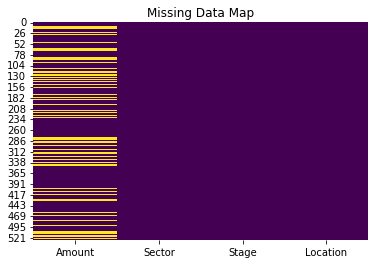

In [70]:
# creating a subset of the relevant columns
rele_col = ['Amount', 'Sector', 'Stage', 'Location']

# creating a dataframe with missing value indicator 
missing_indicator_df = df[rele_col].isnull()

# below we are creating a missing data heat map
sns.heatmap(missing_indicator_df, cmap='viridis', cbar=False)
plt.title('Missing Data Map')
plt.show()

The information from the above supports the assumption that the missing values in the 'Amount' column are missing completely at random (MCAR) or missing at random (MAR). This means that the missingness is unrelated to the 'Sector', 'Location', or 'Stage' variables.

Based on this pattern of missingness, median imputation could be a reasonable option to impute the missing values in the 'Amount' column.

2. CORRELATION PLOT

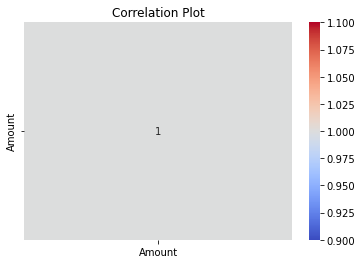

In [71]:
# below we are creating a correlation matrix plot

correl_matrix = df[rele_col].corr()
sns.heatmap(correl_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

NOW LET'S IMPUTE THE MISSING VALUES USING THE MEDIAN IMPUTATION 

In [72]:
# we are creating the median of the not missing values 
median_non_null_Amount = df['Amount'].dropna()

median_Amount = median_non_null_Amount.median() 

# below we are filling in the missing values with the median 
df['Amount'].fillna(median_Amount, inplace=True)

NOW LET'S CONFRIM THE AMOUNT FOR MISSING VALUES AGAIN 

In [73]:
df['Amount'].isnull().sum() # checking for null values 

0

In [74]:
df.isnull().sum() # checking to confirm if any of the column is still have nan

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [75]:
df.to_csv('df18.csv', index=False) # here we are saveing the clean data and naming it df18.csv

BELOW WE ARE WORKING ON THE NEXT DATA SET CALLED 2019 DATA SET

#### 2019 Data

In [76]:
df2.head() # first let's look at the head of the data set 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [77]:
df2.shape # now let's look at the shape of the data to get some idea about the columns and rows 

(89, 9)

In [78]:
df2.columns # now let's look at the columns in the 2019 data sets 

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [79]:
df2.info() # Getting inforamation about the data2 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [80]:
df2.describe(include='object') # getting General descriptive statistics of the data2 dataFrame

,Company/Brand,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,70,84,89,86,89,89,43
unique,87,17,52,88,85,86,50,15
top,Kratikal,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,21,7,2,2,3,12,10


#### Handling Duplicated Data

In [81]:
# below we are checking for duplicated values within the columns 

columns_to_check2 = ['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',]

for column2 in columns_to_check2:
    has_duplicates2 = df2[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company/Brand: True
Founded: True
HeadQuarter: True
Sector: True
What it does: True
Founders: True
Investor: True
Amount($): True
Stage: True


In [82]:
# below we are dropping all the duplicated rows within the colums

df2.drop_duplicates(subset=['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does', 'Founders', 'Investor', 'Amount($)', 'Stage',], inplace=True)

Having some description about the data set, we can now move on with data cleaning
 
MISSING VALUES

In [83]:
missing_values2 = df2.isnull().sum() # looking for missing values in dataFrame 2
missing_values2

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

LET'S DEAL WITH THE MISSING VALUES FROM THE ABOVE OUTPUT

DEALING WIHT MISSING VALUES FOR HEADQUARTER 

### The company/Brand Column has actual data from existing startups. The null Headquarter values can be filled by searching the HeadQuarters on Google

In [84]:
#fillna values in HeadQuarter column

# using google we are able to get accurate info about the Company's headquater

df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == 'Quantiphi', 'HeadQuarter'] = 'Marlborough'
df2.loc[df2['Company/Brand'] == 'Open Secret', 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "Byju's", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Witblox", 'HeadQuarter'] = 'Mumbai'
df2.loc[df2['Company/Brand'] == "SalaryFits", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Pristyn Care", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Springboard", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Fireflies .ai", 'HeadQuarter'] = 'San Francisco'
df2.loc[df2['Company/Brand'] == "Bijak", 'HeadQuarter'] = 'New Delhi'
df2.loc[df2['Company/Brand'] == "truMe", 'HeadQuarter'] = 'Gurugram'
df2.loc[df2['Company/Brand'] == "Rivigo", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "VMate", 'HeadQuarter'] = 'Gurgaon'
df2.loc[df2['Company/Brand'] == "Slintel", 'HeadQuarter'] = 'California'
df2.loc[df2['Company/Brand'] == "Ninjacart", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zebu", 'HeadQuarter'] = 'London'
df2.loc[df2['Company/Brand'] == "Phable", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == "Zolostays", 'HeadQuarter'] = 'Bengaluru'
df2.loc[df2['Company/Brand'] == 'Cubical Labs', 'HeadQuarter'] = 'New Delhi'


In [85]:
# below we are replacing some names within the columns with their official names.
# This ensures uniformity of the names

df2.loc[~df2['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df2['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df2["HeadQuarter"] = df2["HeadQuarter"].replace (['Bangalore','Bangalore City'], 'Bengaluru')
df2['HeadQuarter'] = df2['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [86]:
df2[df2['HeadQuarter'].isnull()] #Check if all null values in HeadQuarter have been filled

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


LET'S DEAL WITH THE MISSING VALUE IN THE SECTOR COLUMN

filling in the missing values in the "Sector" column using the mode (most frequent value) is a reasonable approach when the number of missing values is relatively small compared to the total number of values in the column

In [87]:
#fillna values in Sector column by Google Search
df2.loc[df2['Company/Brand'] == 'VMate', 'Sector'] = 'Short Video Platform'
df2.loc[df2['Company/Brand'] == 'Awign Enterprises', 'Sector'] = 'Workforce Solutions'
df2.loc[df2['Company/Brand'] == 'TapChief', 'Sector'] = 'Online Consulting'
df2.loc[df2['Company/Brand'] == 'KredX', 'Sector'] = 'Fintech'
df2.loc[df2['Company/Brand'] == 'm.Paani', 'Sector'] = 'E-commerce'

In [88]:
df2['Sector'].isnull().sum() # confirming the null values again

0

NOW LET'S DEAL WITH THE STAGE COLUMN 

BUT FIRST LET'S RE-ORDER THE STAEG COLUMN

In [89]:
df2['Stage'].value_counts() # checking for value counts in the stage column

Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
stage to fill in the missing values


In [90]:
cross_table_Sector_Stage_2 = pd.crosstab(df2['Sector'], ['Stage']) # here we are creating a contingency table between stage and sector 
cross_table_Sector_Stage_2

col_0,Stage
Sector,
AI,2
AI & Tech,1
Accomodation,2
AgriTech,4
Automobile,3
Automobile & Technology,1
Automotive tech,2
B2B,1
B2B Supply Chain,1


In [91]:
# below we are getting the percentages 
cross_table_Sector_Stage_per_2 = (cross_table_Sector_Stage_2['Stage'] / cross_table_Sector_Stage_2['Stage'].sum()) * 100
cross_table_Sector_Stage_per_2

Sector
AI                              2.247191
AI & Tech                       1.123596
Accomodation                    2.247191
AgriTech                        4.494382
Automobile                      3.370787
Automobile & Technology         1.123596
Automotive tech                 2.247191
B2B                             1.123596
B2B Supply Chain                1.123596
Banking                         1.123596
Cosmetics                       1.123596
Cybersecurity                   1.123596
E-Sports                        1.123596
E-commerce                      4.494382
E-commerce & AR                 1.123596
E-marketplace                   2.247191
Ecommerce                       1.123596
Edtech                          7.865169
Fintech                         6.741573
Food                            2.247191
Food & Nutrition                1.123596
Food & tech                     1.123596
Food tech                       1.123596
Foodtech                        2.247191
Games    

In [92]:
# here we are looking at the top six stages 
top_six_stages_2 = cross_table_Sector_Stage_per_2.nlargest(6)
top_six_stages_2

Sector
Edtech        7.865169
Fintech       6.741573
AgriTech      4.494382
E-commerce    4.494382
SaaS          4.494382
Technology    4.494382
Name: Stage, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES IN FROM THE TOP SIX 
STAGES 


In [93]:
# Filling missing values in "Stage" column with the top six values

# Normalize the probabilities
normalize_prob_2 = top_six_stages_2 / top_six_stages_2.sum()
# Filling missing values in "Stage" column with the top six values
df2['Stage'] = df2['Stage'].fillna(pd.Series(np.random.choice(top_six_stages_2.index.tolist(), size=len(df2['Stage']), p=normalize_prob_2.values)))

In [94]:
df2['Stage'].isnull().sum() # let's confirm the null values in Stage column again

0

In [95]:
df2.isnull().sum() # confirming the second data sets for missing valeus 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

In [96]:
df2['HeadQuarter'].unique() # let's get some idea about the unique values int he HeadQuater column

array(['Gurugram', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Marlborough', 'New Delhi', 'Ahmedabad', 'London',
       'Haryana', 'San Francisco', 'Chandigarh', 'Jaipur', 'California',
       'Surat', 'Uttar pradesh', 'Hyderabad', 'Rajasthan'], dtype=object)

In [97]:
df2['Sector'].unique() # now let's look at the unique values of the 'Sector' column

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media',
       'Short Video Platform', 'E-Sports', 'Workforce Solutions',
       'Cosmetics', 'B2B', 'Online Consulting', 'Jewellery',
       'B2B Supply Chain', 'Games', 'Food & tech', 'Accomodation',
       'Automotive tech', 'Legal tech', 'Mutual Funds', 'Cybersecurity',
       'Automobile', 'Sports', 'Healthtech', 'Yoga & wellness',
       'Virtual Banking', 'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [98]:
df2['Stage'].unique() # now let's look at the unique values of the 'stage' colum

array(['Technology', 'Series C', 'Fresh funding', 'Series D', 'Fintech',
       'Edtech', 'AgriTech', 'Pre series A', 'Series A', 'Series G',
       'SaaS', 'E-commerce', 'Series B', 'Post series A', 'Seed funding',
       'Seed fund', 'Series E', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A'], dtype=object)

In [99]:
df2['Stage'].value_counts()

Edtech           12
SaaS             10
Series A         10
Technology        9
Series B          8
Pre series A      8
Fintech           7
AgriTech          4
E-commerce        4
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: Stage, dtype: int64

In [100]:
df2[df2['Stage'] == 'AgriTech'] 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
6,Finly,NaN,Bengaluru,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,AgriTech
33,Asteria Aerospace,2011.0,Bengaluru,Robotics & AI,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,"$230,000,000",AgriTech
55,Binca Games,2014.0,Mumbai,Games,It offers games that are available across Indi...,"Rubianca Wadhwa, Sahil Wadhwa",Sunil Gavaskar,Undisclosed,AgriTech
67,Cuemath,2013.0,Bengaluru,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G...","$5,500,000",AgriTech


In [101]:
df.loc[df['Company'] == 'Zolostays', 'Stage'] = 'Series B'

In [102]:
df.loc[df['Company'] == 'Cub McPaws', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'truMe', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'MyGameMate', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Smart Institute', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Spinny', 'Stage'] = 'Series B'

In [103]:
df.loc[df['Company'] == 'DROR Labs Pvt. Ltd.', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Asteria Aerospace', 'Stage'] = 'Series B'
df.loc[df['Company'] == 'Binca Games', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Stanza Living', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'PiBeam', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'Credr', 'Stage'] = 'Series A'

In [104]:
df2.loc[df2['Company/Brand'] == 'FlytBase', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Lil’ Goodness and sCool meal	', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Origo', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Cuemath', 'Stage'] = 'Series A'
df.loc[df['Company'] == 'Phable', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Sarva', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Zoomcar', 'Stage'] = 'Series C'

In [105]:

df2.loc[df2['Company/Brand'] == 'Appnomic', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Finly', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'LivFin', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Afinoz', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Box8', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Ecom Express', 'Stage'] = 'Series B'
df2.loc[df2['Company/Brand'] == 'Nivesh.com', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Ola', 'Stage'] = 'Series F'
df2.loc[df2['Company/Brand'] == 'Ess Kay Fincorp', 'Stage'] = 'Series D'


In [106]:
df2.loc[df2['Company/Brand'] == 'Bombay Shaving', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Nu Genes', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'JobSquare', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == "Byju's", 'Stage'] = 'Series F'
df2.loc[df2['Company/Brand'] == 'Fireflies .ai', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Bombay Shirt Company', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Slintel', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Ninjacart', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Euler Motors', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'Zolozstays', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Oyo', 'Stage'] = 'Series D'


In [107]:
df2.loc[df2['Company/Brand'] == 'Open Secret', 'Stage'] = 'Series C'
df2.loc[df2['Company/Brand'] == 'Witblox', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'SalaryFits', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Medlife', 'Stage'] = 'Series B'
df2.loc[df2['Company/Brand'] == 'Pumpkart', 'Stage'] = 'Seed'
df2.loc[df2['Company/Brand'] == 'VMate', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'WishADish', 'Stage'] = 'Series A'
df2.loc[df2['Company/Brand'] == 'Lawyered', 'Stage'] = 'Seed'


In [108]:
grouped_stages_2 = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
    'Pre series A':'Other Stages'
}

df2['Stage'] = df2['Stage'].replace(grouped_stages_2)
df2['Stage']

0      Early Stage
1        Mid Stage
2     Other Stages
3       Late Stage
4      Early Stage
          ...     
84       Mid Stage
85      Late Stage
86       Mid Stage
87      Technology
88      Late Stage
Name: Stage, Length: 89, dtype: object

In [109]:
 # creating or maintaining only the valid stages

unwanted_stages = ['Fintech', 'Technology', 'AgriTech', 'E-commerce', 'Edtech']
df2['Stage'] = df2['Stage'].replace(unwanted_stages, np.nan)

In [110]:
df2['Stage'].isnull().sum() # checking for unique values in the stage column 

13

In [111]:
df2['Stage'].count() # getting the total of the values in the Stage column

76

In [112]:
# getting the mode of the non-null values 

non_null_values_stg = df2['Stage'].dropna()
mode_non_null_stg = non_null_values_stg.mode()  

In [113]:
df2['Stage'] = df2['Stage'].astype(str) # converting the stage column to string

In [114]:
df2['Stage'].fillna(mode_non_null_stg, inplace=True) # filling in the null value with the mode

In [115]:
df2['Stage'].isnull().sum() # checking for null values again

0

In [116]:
df2.isnull().sum() # let's check for null vlaues and sum them up 

Company/Brand     0
Founded          29
HeadQuarter       0
Sector            0
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage             0
dtype: int64

Standardizing Data Formats

now let's see how we can standardize tha data set to make sure we have the same format of data points 

first let's check for dash symbols within the columns using a simple python function 

In [117]:
# checking for '-' symbol within the columns

columns_to_check2 = ['Company/Brand', 'HeadQuarter', 'Sector', 'What it does', 'Amount($)', 'Stage']

for column2 in columns_to_check2:
    has_dash_symbols2 = df2[column2].astype(str).str.contains('-').any()
    print(f'{column2}: {has_dash_symbols2}')

Company/Brand: False
HeadQuarter: False
Sector: True
What it does: True
Amount($): False
Stage: False


In [118]:
# checking for currency symbol 

columns_to_check2 = ['Company/Brand','HeadQuarter', 'Sector', 'What it does', 'Amount($)']

for column2 in columns_to_check2:
    has_currency_symbols = df2[column2].astype(str).str.contains('[$₹]').any()
    print(f'{column2}: {has_currency_symbols}')

Company/Brand: False
HeadQuarter: False
Sector: False
What it does: False
Amount($): True


In [119]:
# replacing the '-' symbols using a simple function 

dash_currency_columns = ['Sector', 'What it does', 'Stage']

for dash_columns2 in dash_currency_columns:
    dash_replaced2 = df2[dash_columns2].replace('-', np.nan, inplace=True)

now let's handle the dash symbols in the Amount column, clean and format the amount the column correctly 

In [120]:
df2['Amount($)'].unique() # let's check for unique values 

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [121]:
# Cleaning the Amounts column & # removing the currency symbol in df_2019
df2['Amount($)'] = df2['Amount($)'].astype(str).str.replace('[\₹$,]', '', regex=True)
df2['Amount($)'] = df2['Amount($)'].str.replace('Undisclosed', '0', regex=True)
df2['Amount($)'].replace(",", "", inplace = True, regex=True)
df2['Amount($)'].replace("—", 0, inplace = True, regex=True)

In [122]:
df2['Amount($)'] = df2['Amount($)'].astype(float) # here we are converting the amount column to float data type 
type(df2['Amount($)'][0])

numpy.float64

In [123]:
df2['Amount($)'] # here we are looking at the Amount column 

0       6300000.0
1     150000000.0
2      28000000.0
3      30000000.0
4       6000000.0
         ...     
84     20000000.0
85    693000000.0
86      5000000.0
87     50000000.0
88     33000000.0
Name: Amount($), Length: 89, dtype: float64

In [124]:
df2['Amount($)'].unique() # this line of code looks at the unique value 

array([6.300e+06, 1.500e+08, 2.800e+07, 3.000e+07, 6.000e+06, 0.000e+00,
       1.000e+06, 2.000e+07, 2.750e+08, 2.200e+07, 5.000e+06, 1.405e+05,
       5.400e+08, 1.500e+07, 1.827e+05, 1.200e+07, 1.100e+07, 1.550e+07,
       1.500e+06, 5.500e+06, 2.500e+06, 1.400e+05, 2.300e+08, 4.940e+07,
       3.200e+07, 2.600e+07, 1.500e+05, 4.000e+05, 2.000e+06, 1.000e+08,
       8.000e+06, 1.000e+05, 5.000e+07, 1.200e+08, 4.000e+06, 6.800e+06,
       3.600e+07, 5.700e+06, 2.500e+07, 6.000e+05, 7.000e+07, 6.000e+07,
       2.200e+05, 2.800e+06, 2.100e+06, 7.000e+06, 3.110e+08, 4.800e+06,
       6.930e+08, 3.300e+07])

In [125]:
df2['Amount($)'].isnull().sum()

0

### Clean Text Data

In [126]:
# Clean Company Name column
df2['Company/Brand'] = df2['Company/Brand'].str.strip()  # Remove leading and trailing spaces
df2['Company/Brand'] = df2['Company/Brand'].str.title()  # Standardize capitalization

# Clean Company Name column
df2['Sector'] = df2['Sector'].str.strip()  # Remove leading and trailing spaces
df2['Sector'] = df2['Sector'].str.title()  # Standardize capitalization

# Clean About Company column
df2['What it does'] = df2['What it does'].str.strip()  # Remove leading and trailing spaces

# Function to handle special characters or encoding issues
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return cleaned_text

# Apply the clean_text function to the About Company column
df2['What it does'] = df2['What it does'].apply(clean_text)

# Print the cleaned DataFrame
df2.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,Gurugram,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000.0,Early Stage
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topicbased j...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Mid Stage
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000.0,Other Stages
3,Homelane,2014.0,Chennai,Interior Design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",30000000.0,Late Stage
4,Nu Genes,2004.0,Telangana,Agritech,It is a seed company engaged in production pro...,Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),6000000.0,Early Stage


In [127]:
# Dropping the columns that are not important to our analysis

df2.drop(columns=['Founded','Founders','Investor'], inplace=True)

In [128]:
df2.insert(6,"Funding Year", 2019) # here we are inserting a new column to keep track of the data set after combining 

In [129]:
# below we are renaming the columns to enure consistency 

df2.rename(columns = {'Company/Brand':'Company',
                        'HeadQuarter':'Location',
                        'Amount($)':'Amount',
                        'What it does':'About'},
             inplace = True)

In [130]:
df2.head() # let's comfirm the data set by looking at the head before we save it 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Bombay Shaving,Gurugram,Ecommerce,Provides a range of male grooming products,6300000.0,Early Stage,2019
1,Ruangguru,Mumbai,Edtech,A learning platform that provides topicbased j...,150000000.0,Mid Stage,2019
2,Eduisfun,Mumbai,Edtech,It aims to make learning fun via games,28000000.0,Other Stages,2019
3,Homelane,Chennai,Interior Design,Provides interior designing solutions,30000000.0,Late Stage,2019
4,Nu Genes,Telangana,Agritech,It is a seed company engaged in production pro...,6000000.0,Early Stage,2019


In [131]:
df2.to_csv('df_19.csv', index=False) # here we are saving the set and naming it df_19.csv

In [132]:
df2.isnull().sum() # checking to confirm if any of the columns still have nan

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

NOW LET'S WORK ON THE THIRD DATA SET 2020

### 2020 Data

In [133]:
df3.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [134]:
df3.info() # Get inforamation about the df3 dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [135]:
df3.columns #accessing specific columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [136]:
df3.describe(include='object') # Getting general descriptive statistics of the data2 dataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Stage,column10
count,1055,961,1042,1055,1043,1017,591,2
unique,905,77,302,990,927,848,42,2
top,Nykaa,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,Series A,Pre-Seed
freq,6,317,80,4,6,20,96,1


In [137]:
df3.describe(include='float') # Getting general descriptive statistics for float columns

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


#### Handling Duplicated Data

In [138]:
# checking for duplicated values 

columns_to_check3 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']
for column2 in columns_to_check3:
    has_duplicates2 = df3[column2].duplicated().any()
    print(f'{column2}: {has_duplicates2}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [139]:
# below we are dropping the duplicates rows 

df3.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [140]:
df3.isna().sum() #looking for missing values in dataFrame 2

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            253
Stage             462
column10         1050
dtype: int64

In [141]:
df3['HeadQuarter'].unique() #displaying the unique values found in the 'HeadQuarter' column.

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [142]:
# we are replacing the data in the Headquater by researching from google

df3.loc[df3['Company_Brand'] == 'Habitat', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Wealth Bucket', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'EpiFi', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'XpressBees', 'HeadQuarter'] = 'Pune'
df3.loc[df3['Company_Brand'] == 'Shiksha', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Byju', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Zomato', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Rentomojo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Mamaearth', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Testbook', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Techbooze', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Rheo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Klub', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'TechnifyBiz', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Aesthetic Nutrition', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Gamerji', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Phenom People', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Teach Us', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invento Robotics', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Kristal AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Samya AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Skylo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartKarrot', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Park+', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'LogiNext', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'MoneyTap', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RACEnergy', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Oye! Rickshaw', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fleetx', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Raskik', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Pravasirojgar', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Kaagaz Scanner', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Exprs', 'HeadQuarter'] = 'Madhapur'
df3.loc[df3['Company_Brand'] == 'Verloop.io', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Otipy', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Daalchini', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Suno India', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Eden Smart Homes', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Bijnis', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Oziva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Yulu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Peppermint', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Jiffy ai', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Postman', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'F5', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Myelin Foundry', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'iNurture Education', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Credgencies', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Vahak', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Illumnus', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'HeadQuarter'] = 'Coimbatore'
df3.loc[df3['Company_Brand'] == 'Shiprocket', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Phable', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Generic Aadhaar', 'HeadQuarter'] = 'Thane'
df3.loc[df3['Company_Brand'] == 'Nium', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'DailyHunt', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Pedagogy', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Sarva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NIRA', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Indusface', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Morning Context', 'HeadQuarter'] = 'Singapore'
df3.loc[df3['Company_Brand'] == 'Savvy Co op', 'HeadQuarter'] = 'New York'
df3.loc[df3['Company_Brand'] == 'BLive', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Toch', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Setu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Rebel Foods', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Amica', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Fingerlix', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Zupee', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'DeHaat', 'HeadQuarter'] = 'Patna'
df3.loc[df3['Company_Brand'] == 'Akna Medical', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RaRa Delivery', 'HeadQuarter'] = 'Jakarta'
df3.loc[df3['Company_Brand'] == 'Obviously AI', 'HeadQuarter'] = 'San Francisco'
df3.loc[df3['Company_Brand'] == 'CoinDCX', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NuNu TV', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fintso', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Smart Coin', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Shop101', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Neeman', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invideo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'AvalonMeta', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartVizX', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Carbon Clean', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Onsitego', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Nova Credit', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'HempStreet', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Classplus', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Chaayos', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Altor', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'WorkIndia', 'HeadQuarter'] = 'Mumbai'

In [143]:
# below we are reformating the Headquater column with their official values
df3.loc[~df3['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df3['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df3["HeadQuarter"] = df3["HeadQuarter"].replace (['Bangalore','Banglore','Bangalore City'], 'Bengaluru')
df3['HeadQuarter'] = df3['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

In [144]:
df3["column10"].value_counts() # Calculate the frequency count of unique values in the "Amount" column

Pre-Seed      1
Seed Round    1
Name: column10, dtype: int64

In [145]:
df3[df3['column10'].isin(['Pre-Seed','Seed Round'])] #checking if the values in the 'column10' column match either 'Pre-Seed' or 'Seed Round'.

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bengaluru,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


In [146]:
df3['Sector'].unique # ckecking for unique values in the Sector column 

<bound method Series.unique of 0                 AgriTech
1                   EdTech
2       Hygiene management
3                   Escrow
4                 AgriTech
               ...        
1050                Edtech
1051               Fintech
1052             Cosmetics
1053             Transport
1054              Logitech
Name: Sector, Length: 1052, dtype: object>

In [147]:
df3[df3['Sector'].isnull()] # we are checking for null values

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
518,Text Mercato,2015.0,Bengaluru,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600.0,Series A,None
569,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000.0,Series D,None
687,Leap Club,NaN,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",340000.0,Pre seed round,None
699,Juicy Chemistry,2014.0,Coimbatore,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000.0,Series A,None
707,Magicpin,2015.0,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000.0,None,None
732,Servify,NaN,Mumbai,None,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000.0,None,None
746,Wagonfly,2018.0,Bengaluru,None,Contactless shopping and delivery experience b...,Raghavendra Prasad,Investment Trust of India,500000.0,None,None
763,DrinkPrime,NaN,Bengaluru,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",NaN,Seed Round,None
809,Kitchens Centre,2019.0,New Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000.0,Seed Round,None
918,Innoviti,NaN,Bengaluru,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000.0,None,None


In [148]:
# we replacing the null values with the actual data by searching from google

df3.loc[df3['Company_Brand'] == 'Text Mercato', 'Sector'] = 'E-commerce Technology'
df3.loc[df3['Company_Brand'] == 'Magicpin', 'Sector'] = 'Hyperlocal Services'
df3.loc[df3['Company_Brand'] == 'Leap Club', 'Sector'] = 'Professional Networking'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'Sector'] = 'Organic Skincare'
df3.loc[df3['Company_Brand'] == 'Servify', 'Sector'] = 'Technology Services'
df3.loc[df3['Company_Brand'] == 'Wagonfly', 'Sector'] = 'Retail Technology'
df3.loc[df3['Company_Brand'] == 'DrinkPrime', 'Sector'] = 'Water Technology'
df3.loc[df3['Company_Brand'] == 'Kitchens Centre', 'Sector'] = 'Food Service Infrastructure'
df3.loc[df3['Company_Brand'] == 'Innoviti', 'Sector'] = 'Fintech'
df3.loc[df3['Company_Brand'] == 'Brick&Bolt', 'Sector'] = 'Construction and Real Estate'
df3.loc[df3['Company_Brand'] == 'Toddle', 'Sector'] = 'EdTech'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'Sector'] = 'EdTech'

In [149]:
df3[df3['Sector'].isnull()] # checking to confirm the null values 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


In [150]:
df3['Stage'].unique # checking the unique values in the data set

<bound method Series.unique of 0             None
1         Pre-seed
2         Pre-seed
3             None
4             None
           ...    
1050          None
1051    Seed Round
1052          None
1053      Series C
1054      Series A
Name: Stage, Length: 1052, dtype: object>

LET'S CLEAN THE STAGE COLUMN 

BELOW WE ARE RE-ORDERING THE STAGE COLUMN 

In [151]:
grouped_stages_3 = {
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Series A': 'Mid Stage',
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'Pre-seed Round': 'Other Stages',
    'Pre series C': 'Other Stages',
    'Pre series A1': 'Other Stages',
    'Pre seed round': 'Other Stages',
    'Pre seed Round': 'Other Stages',
    'Pre series A': 'Other Stages',
    'Pre series B': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-series': 'Other Stages',
    'Pre-series B': 'Other Stages',
    'Pre-series C': 'Other Stages',
    'Series C, D': 'Other Stages'
}

df3['Stage'] = df3['Stage'].replace(grouped_stages_3)


HANDLING THE HEADQUATER COLUMN 


In [152]:
# BELOW WE ARE TAKING CARE OF THE MISSING HEADQUATER / LOACTION 

df3.loc[df3['Company_Brand'] == 'Habitat', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Wealth Bucket', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'EpiFi', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'XpressBees', 'HeadQuarter'] = 'Pune'
df3.loc[df3['Company_Brand'] == 'Shiksha', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Byju', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Zomato', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Rentomojo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Mamaearth', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'HaikuJAM', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Testbook', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Techbooze', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Rheo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Klub', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'TechnifyBiz', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Aesthetic Nutrition', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Gamerji', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Phenom People', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Teach Us', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invento Robotics', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Kristal AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Samya AI', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Skylo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartKarrot', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Park+', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'LogiNext', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'MoneyTap', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RACEnergy', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Oye! Rickshaw', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fleetx', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Raskik', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Pravasirojgar', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Kaagaz Scanner', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Exprs', 'HeadQuarter'] = 'Madhapur'
df3.loc[df3['Company_Brand'] == 'Verloop.io', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Otipy', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Daalchini', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Suno India', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Eden Smart Homes', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Bijnis', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Oziva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Yulu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Peppermint', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Jiffy ai', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Postman', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'F5', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Myelin Foundry', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'iNurture Education', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Credgencies', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'Vahak', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Illumnus', 'HeadQuarter'] = 'Gurgaon'
df3.loc[df3['Company_Brand'] == 'Juicy Chemistry', 'HeadQuarter'] = 'Coimbatore'
df3.loc[df3['Company_Brand'] == 'Shiprocket', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Phable', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Generic Aadhaar', 'HeadQuarter'] = 'Thane'
df3.loc[df3['Company_Brand'] == 'Nium', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'DailyHunt', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Pedagogy', 'HeadQuarter'] = 'Ahmedabad'
df3.loc[df3['Company_Brand'] == 'Sarva', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NIRA', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Indusface', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Morning Context', 'HeadQuarter'] = 'Singapore'
df3.loc[df3['Company_Brand'] == 'Savvy Co op', 'HeadQuarter'] = 'New York'
df3.loc[df3['Company_Brand'] == 'BLive', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Toch', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Setu', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Rebel Foods', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Amica', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Fingerlix', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Zupee', 'HeadQuarter'] = 'Gurugram'
df3.loc[df3['Company_Brand'] == 'DeHaat', 'HeadQuarter'] = 'Patna'
df3.loc[df3['Company_Brand'] == 'Akna Medical', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'RaRa Delivery', 'HeadQuarter'] = 'Jakarta'
df3.loc[df3['Company_Brand'] == 'Obviously AI', 'HeadQuarter'] = 'San Francisco'
df3.loc[df3['Company_Brand'] == 'CoinDCX', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'NuNu TV', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Fintso', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Smart Coin', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Shop101', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Neeman', 'HeadQuarter'] = 'Hyderabad'
df3.loc[df3['Company_Brand'] == 'Invideo', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'AvalonMeta', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'SmartVizX', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Carbon Clean', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'Onsitego', 'HeadQuarter'] = 'Mumbai'
df3.loc[df3['Company_Brand'] == 'Nova Credit', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'HempStreet', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Classplus', 'HeadQuarter'] = 'Noida'
df3.loc[df3['Company_Brand'] == 'Chaayos', 'HeadQuarter'] = 'New Delhi'
df3.loc[df3['Company_Brand'] == 'Altor', 'HeadQuarter'] = 'Bengaluru'
df3.loc[df3['Company_Brand'] == 'WorkIndia', 'HeadQuarter'] = 'Mumbai'

In [153]:
df3[df3['HeadQuarter'].isnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10


In [154]:
# below we are reformating the Headquater column with their official values
df3.loc[~df3['HeadQuarter'].str.contains('New Delhi', na=False), 'HeadQuarter'] = df3['HeadQuarter'].str.replace('Delhi', 'New Delhi')
df3["HeadQuarter"] = df3["HeadQuarter"].replace (['Bangalore','Banglore','Bangalore City'], 'Bengaluru')
df3['HeadQuarter'] = df3['HeadQuarter'].replace (['Gurgaon'], 'Gurugram')

FOR NOW LET'S REPLACE ALL THE 'NONE' WITH NAN VALUES 

In [155]:
df3['Stage'] = df3['Stage'].astype(str)
df3['Stage'].replace('None', np.nan, inplace=True) # here we convert all the values to string so we can replace all the None values


In [156]:
df3['Stage'] # now we confirm the stage column again

0               NaN
1       Early Stage
2       Early Stage
3               NaN
4               NaN
           ...     
1050            NaN
1051    Early Stage
1052            NaN
1053      Mid Stage
1054      Mid Stage
Name: Stage, Length: 1052, dtype: object

WE WILL BE REPLACING THE NULL VALUES IN THE STAGE COLUMN USING THE 
MOST 6 OCCURENCE OF THE STAGES BUT TO GET THAT WE NEED THE SECTOR COLUMN 

WHICH MEANS WE NEED TO DEAL WITH NULL VALUES IN THE SECTOR COLUMN FIRST

In [157]:
df3['Sector'].count() # getting the total values in the Sector column 

1052

In [158]:
# below we are confirming the null values in the sector column 
missing_values3 = df3['Stage'].isnull().sum()

percent_miss_sec_3 = (missing_values3 / df3['Stage'].count()) * 100
percent_miss_sec_3

78.30508474576271

 based on the result that only 1.25% of the values in the 'Sector' column are missing, it is reasonable to consider imputing the null values with the mode of the 'Sector' column.

below:


In [159]:
non_null_values_3 = df3[df3['Sector'].notnull()]  # Filtering non-null values
mode_sector = non_null_values_3['Sector'].mode().iloc[0]  # Getting the mode value
df3['Sector'].fillna(mode_sector, inplace=True)  # Imputing null values with the mode

In [160]:
# NOW LET'S CONFIRM THE NULL VALUES AGAIN 
df3['Sector'].isnull().sum()

0

NOW WE CAN USE OUR STRATEGY IN COMBINATION OF THE SECTOR COLUMN TO FILL IN THE 
NAN VALUES FOR THE STAGE COLUMN 

In [161]:
# creating the contingency table
conting_tabl_3 = pd.crosstab(df3['Stage'], ['Sector'])
conting_tabl_3

col_0,Sector
Stage,
Early Stage,175
Late Stage,35
Mid Stage,206
Other Stages,174


FINDING THEIR PERCENTAGES

In [162]:
total_non_null = 462 # the total number of nulls

percent_early_stage = (175 / total_non_null) * 100
percent_late_stage = (35 / total_non_null) * 100   # here we are getting their perentages 
percent_mid_stage = (206 / total_non_null) * 100
percent_other_stage = (174 / total_non_null) * 100

In [163]:
percent_early_stage, percent_late_stage,percent_mid_stage,percent_other_stage # here the percentages displayed below 

(37.878787878787875, 7.575757575757576, 44.58874458874459, 37.66233766233766)

NOW WE WILL FIND AND SELECT THE STAGES BASE ON THE SECTOR COLUMN AND USE THIS STAGES 
AND AT A RANDOMIZED CHOICE TO FILL IN THE NULL VALUES 

In [164]:
stage_percentages = {
    'Early Stage': percent_early_stage,
    'Late Stage': percent_late_stage,
    'Mid Stage': percent_mid_stage,           # CREATING A LIST OF THE PERCENTAGES 
    'Other Stages': percent_other_stage
}

Filling in the null values in the 'Stage' column proportionally using the apply method and a lambda function:

In [165]:
# BELOW WE ARE FILLING IN THE MISSING VALUES

total_prob = sum(stage_percentages.values())
normalized_probs = [prob / total_prob for prob in stage_percentages.values()]

df3['Stage'] = df3['Stage'].apply(lambda x: np.random.choice(list(stage_percentages.keys()), p=normalized_probs) if pd.isnull(x) else x)


In [166]:
df3['Stage'].isnull().sum() # CONFIRMING THE NULL VALUES AGAIN 

0

In [167]:
df3["Amount"].value_counts()# Calculate the frequency count of unique values in the "Amount" column

1000000.0     53
2000000.0     39
3000000.0     27
5000000.0     24
500000.0      22
              ..
2879000.0      1
26500000.0     1
351000.0       1
46761000.0     1
8043000.0      1
Name: Amount, Length: 300, dtype: int64

In [168]:
# checking for '-' symbol within the columns
df3_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']
for col in df3_to_check_colomns:
    dash_symbols = df3[col].astype(str).str.contains('—').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: False
HeadQuarter: False
Sector: False
What_it_does: False
Stage: False
Amount: False


In [169]:
# checking for '$' symbol within the columns
df3_to_check_colomns = ['Company_Brand','HeadQuarter', 'Sector', 'What_it_does','Stage','Amount']

for col in df3_to_check_colomns:
    dash_symbols = df3[col].astype(str).str.contains('$').any()
    print(f"{col}: {dash_symbols}")

Company_Brand: True
HeadQuarter: True
Sector: True
What_it_does: True
Stage: True
Amount: True


# Converting Amounts in Indian Rupees to Us Dollar

In [170]:

c = CurrencyRates()  # Instantiate an object of the CurrencyRates class

# Creating temporary columns to help with the conversion of INR to USD
df3['Amount'] = df3['Amount'].astype(str)  # Convert 'Amount' column to string
df3['Indiancurr'] = df3['Amount'].str.rsplit('₹', n=2).str[-1]
df3['Indiancurr'] = df3['Indiancurr'].apply(float).fillna(0)
df3['UsCurr'] = df3['Indiancurr'] * c.get_rate('INR', 'USD')
df3['UsCurr'] = df3['UsCurr'].replace(0, np.nan)
df3['UsCurr'] = df3['UsCurr'].fillna(df3['Amount'])
df3['UsCurr'] = df3['UsCurr'].replace("$", "", regex=True)
df3['Amount'] = df3['UsCurr']
df3['Amount'] = df3['Amount'].apply(lambda x: float(str(x).replace("$","")))
df3['Amount'] = df3['Amount'].replace(0, np.nan)

# Defining a lambda function to format the amount
format_amount = lambda amount: "{:,.2f}".format(amount)

# Applying the formatting lambda function to the 'Amount' column
df3['Amount'] = df3['Amount'].map(format_amount)


In [171]:
# Cleaning the Amounts column

df3['Amount'] = df3['Amount'].apply(str)
df3['Amount'].replace(",", "", inplace = True, regex=True)
df3['Amount'].replace("$", "", inplace = True, regex=True)
df3['Company_Brand'].replace("$", "", inplace = True, regex=True)
df3['HeadQuarter'].replace("$", "", inplace = True, regex=True)
df3['Sector'].replace("$", "", inplace = True, regex=True)
df3['What_it_does'].replace("$", "", inplace = True, regex=True)
df3['Stage'].replace("$", "", inplace = True, regex=True)

In [172]:
# Remove leading or trailing spaces
df3['Amount'] = df3['Amount'].str.strip()

# Remove commas and symbols
df3['Amount'] = df3['Amount'].str.replace(',', '')
df3['Amount'] = df3['Amount'].str.replace('$', '')
# Add more replacements for other symbols as needed

# Convert 'Amount' column to float
df3['Amount'] = df3['Amount'].astype(float)

# Convert 'Amount' column to float, handling NaN values explicitly
df3['Amount'] = pd.to_numeric(df3['Amount'], errors='coerce')

# Set the float format
pd.options.display.float_format = '{:.2f}'.format

In [173]:
# Convert the values to regular floats and handle NaN values
amount_values = np.asarray(df3['Amount'], dtype=float)
amount_values[np.isnan(amount_values)] = np.nan

# Print the unique values
print(amount_values)

[  2425.47   1212.73       nan ...  97018.79  97540.26 109146.14]


In [174]:
print(df3['Amount'].unique())

[2.42547000e+03 1.21273000e+03            nan 4.85094000e+03
 4.12330000e+03 7.27641000e+03 5.45730680e+05 1.21273500e+04
 2.42547000e+04 1.45528200e+04 8.00404995e+06 1.45528000e+03
 9.09551100e+04 6.06367400e+04 6.06367000e+03 3.63820500e+04
 1.21273480e+05 1.75846552e+06 1.21273484e+06 2.54674320e+05
 4.85093900e+04 2.42546970e+05 6.79132000e+03 3.33502000e+03
 5.45730700e+04 1.81910230e+05 4.72966588e+06 8.48914400e+04
 6.18494800e+04 8.48914389e+06 2.78929000e+04 8.48914000e+03
 2.30419620e+05 1.09146140e+05 4.85093940e+05 9.09551000e+03
 1.81910200e+04 9.45933200e+04 6.06367420e+05 9.70187870e+05
 3.63820450e+05 2.06164900e+04 3.03183700e+04 4.85090000e+02
 4.00202500e+05 4.24457190e+05 3.63820000e+03 3.03183710e+05
 4.24457200e+04 2.42546968e+06 7.27640900e+04 1.57655500e+04
 4.97221300e+04 6.97323000e+03 9.70188000e+03 3.39565760e+05
 2.18292270e+05 3.88075100e+04 1.09146100e+04 3.03184000e+03
 5.69985400e+04 9.09551130e+05 9.70187900e+04 1.46740916e+06
 6.67004160e+05 4.002025

In [175]:
df3['Amount'] = df3['Amount'].astype(float) #converting the values in the "Amount" column of DataFrame df3 to the float data type.

In [176]:
df3["Amount"] # checking the amount column to comfirm the changes 

0        2425.47
1        1212.73
2            NaN
3        4850.94
4        4123.30
          ...   
1050    18191.02
1051   160081.00
1052    97018.79
1053    97540.26
1054   109146.14
Name: Amount, Length: 1052, dtype: float64

DEALING WITH MISSING VALUES IN THE AMOUNT COLUMN IN DATA SET 2020

In [177]:
#creating the contingency table

conting_table_3 = pd.crosstab(df3['Sector'], df3['Amount'].isnull())

In [178]:
# below we are performing the chi-square test
chi2_3, p_value_3, _,_ = chi2_contingency(conting_table_3)
chi2_3
p_value_3

0.1839099738666176

In [179]:
# we are interpretting the chi-sqaure test 
significance_level_3 = 0.05

if p_value_3 < significance_level_3:
    print("There is a significant association between the missing values in the 'Amount' column and the 'Sector' column.")
else:
    print("There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.")

There is no significant association between the missing values in the 'Amount' column and the 'Sector' column.


NOW LET'S CHECK OUTLIERS TO EITHER RULE OUT MEAN IMPUTATION OF ACCEPT IT 

FIRST WE WILL USE THE BOX PLOT

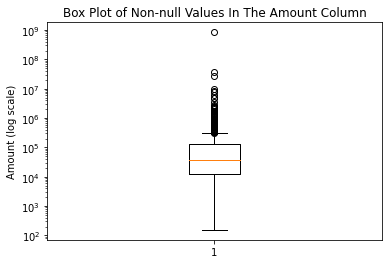

In [180]:
# but we will use the non-null values to check for outliers and the statistical values 
non_null_value_3 = df3['Amount'].dropna()

# now let's create our box plot with the log scale
plt.boxplot(non_null_value_3)
plt.ylabel('Amount (log scale)')
plt.title('Box Plot of Non-null Values In The Amount Column')
plt.yscale('log')
plt.show()

FROM THE BOX PLOT OBSERVATION WE CAN SAY:


the box plot shows that the data points are skewed towards the bottom and there are some points far away from the bottom of the box, it indicates the presence of outliers. Outliers can significantly affect the mean, making it less representative of the central tendency of the data. In this case, using the median for imputation rather than the mean wll be a more robust approach.

TO FURTHER UNDERSTAND THE DATA, LET'S USE A HISTOGRAM TO SEE THE DISTRIBUTION OF

DATA POINTS IN THE AMOUNT COLUMN

<function matplotlib.pyplot.show(close=None, block=None)>

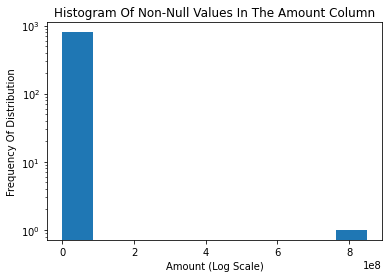

In [181]:
# Filtering out the null values 
non_null_value_3 = df3['Amount'].dropna()

# Creating a histogram of the amount column with a log scale
plt.hist(non_null_value_3, bins=10, log=True)
plt.xlabel('Amount (Log Scale)')
plt.ylabel('Frequency Of Distribution')
plt.title('Histogram Of Non-Null Values In The Amount Column')
plt.show

FROM THE ABOVE DISPLAY OF THE HISTOGRAM, WE CAN MAKE THE FOLLOWING DEDUCTIONS

The histogram shows the distribution of the 'Amount' column, indicating that the majority of values are concentrated in the lower range with high frequency, while the higher values are sparsely distributed.

This distribution pattern suggests that there may be a right-skewness or a long tail in the data. It indicates that there are relatively fewer instances with higher values compared to the instances with lower values.

the distribution pattern observed in the histogram, with a concentration of values in the lower range and a sparser distribution towards higher values, suggests that using the median for imputation could be a suitable approach.

NOTE:

The median is a measure of central tendency that is less affected by outliers or extreme values compared to the mean. In our case, since there are some data points that are far away from the majority of values, using the median as an imputation method can provide a more robust estimate of the central value of the 'Amount' column.

In [182]:
# Replace 'NAN' strings with actual NaN values
df3['Amount'] = df3['Amount'].replace('NAN', np.nan)

In [183]:
# Filter the non-null values of the 'Amount' column:
non_null_values_3

# Calculating the median of the non-null values:
median_value_3 = non_null_values_3.median()

# Imputing the null values in the 'Amount' column with the median value:

df3['Amount'].fillna(median_value_3, inplace=True)

In [184]:
df3['Amount'].isnull().sum() # confirming the null values in the Amount column Again to be sure 

253

In [185]:
df3['Amount']

0        2425.47
1        1212.73
2            NaN
3        4850.94
4        4123.30
          ...   
1050    18191.02
1051   160081.00
1052    97018.79
1053    97540.26
1054   109146.14
Name: Amount, Length: 1052, dtype: float64

In [186]:
df3['Amount'] = df3['Amount'].astype(float)  # Convert 'Amount' column back to float


In [187]:
df3['Amount'].isnull().sum()

253

In [188]:
df3 = df3.drop(['column10','Founded','Founders','Investor'], axis=1) #dropping specific columns from the DataFrame 

In [189]:
df3['Funding Year'] = 2020 # Assign 2020 to the 'Funding Year' column

In [190]:
new_column_names = {'Company_Brand': 'Company', 'What_it_does': 'About', 'HeadQuarter': 'Location'} # Renaming columns
df3 = df3.rename(columns=new_column_names)

In [191]:
df3 = df3.drop(['Indiancurr', 'UsCurr'], axis=1) # dropping these columns 


In [192]:
df3.head() # checking the head of the data to confirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Aqgromalin,Chennai,AgriTech,Cultivating Ideas for Profit,2425.47,Other Stages,2020
1,Krayonnz,Bengaluru,EdTech,An academy-guardian-scholar centric ecosystem ...,1212.73,Early Stage,2020
2,PadCare Labs,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,NaN,Early Stage,2020
3,NCOME,New Delhi,Escrow,Escrow-as-a-service platform,4850.94,Mid Stage,2020
4,Gramophone,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,4123.30,Mid Stage,2020


In [193]:
df3.isnull().sum() # checking if any of the column still have nan

Company           0
Location          0
Sector            0
About             0
Amount          253
Stage             0
Funding Year      0
dtype: int64

In [194]:
df3['Amount'].median()

36382.05

In [195]:
impute_value = df3['Amount'].median()
df3['Amount']= df3['Amount'].fillna(impute_value)

In [196]:
df3.isnull().sum()

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [197]:
# saving the clean data set

df3.to_csv('df_2020.csv', index=False)

#### 2021 Data

In [198]:
df4.head() #showing the first five rows

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [199]:
df4.shape #understanding the size of your DataFrame

(1209, 9)

In [200]:
df4.columns #retrieving the column names of the DataFrame

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [201]:
df4.info() #providing a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [202]:
df4.describe(include='object') #providing descriptive statistics for columns of object data type in the DataFrame

,Company_Brand,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208,1209,1209,1205,1147,1206,781
unique,1033,70,254,1143,1095,937,278,31
top,BharatPe,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,426,122,4,7,24,73,246


In [203]:
#dropping all duplicates in all the columns 
df4.drop_duplicates(inplace=True)

In [204]:
df4.isnull().sum() # looking for missing values in dataFrame

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          61
Amount             3
Stage            421
dtype: int64

#### Handling Duplicated Data

In [205]:
df4['HeadQuarter'].dropna(inplace=True) # dropping the nan in the Headquarter column

In [206]:
#checking for duplicate values in each column of the DataFrame df4
columns_to_check4 = ['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage']

for column4 in columns_to_check4:
    has_duplicates4 = df4[column4].duplicated().any()
    print(f'{column4}: {has_duplicates4}')

Company_Brand: True
Founded: True
HeadQuarter: True
Sector: True
What_it_does: True
Founders: True
Investor: True
Amount: True
Stage: True


In [207]:
#removing any rows that have the same values in all the specified columns.
df4.drop_duplicates(subset=['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Amount', 'Stage'], inplace=True)

#### Handling Categorical Data

In [208]:
df4['HeadQuarter'].unique() # here we are looking at the unique values in the column 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [209]:
# From obersavtion, there is use of official and unofficial names of certain cities.
# The incorrect names need to be rectified for correct analysis, eg A city with more than one name.

df4['HeadQuarter'] = df4['HeadQuarter'].replace (['Bangalore','Bangalore City','Belgaum'], 'Bengaluru')
df4['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)
df4['HeadQuarter'] = df4['HeadQuarter'].str.replace('New Delhi','Delhi')

In [210]:
#using a filter to get all the miss match values in the HeadQuater column

df4[df4['HeadQuarter'].isin(['Online Media\t#REF!', 'Pharmaceuticals\t#REF!','Computer Games','Information Technology & Services','Food & Beverages'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.00,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
241,MasterChow,2020.00,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed
242,Fullife Healthcare,2009.00,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
1100,Sochcast,2020.00,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None
1176,Peak,2014.00,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [211]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "FanPlay", ["HeadQuarter", "Amount", "Stage"]] = ["None", "$1200000","None"]
df4.loc[df4["Company_Brand"] == "FanPlay"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.00,None,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",$1200000,None


In [212]:
#assigning specific values to HeadQuarter", "Amount", "Stage in the DataFrame

df4.loc[df4["Company_Brand"] == "MasterChow", ["HeadQuarter", "Sector"]] = ["Hauz Khas", "Food & Beverages"]
df4.loc[df4["Company_Brand"] == "MasterChow"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
241,MasterChow,2020.00,Hauz Khas,Food & Beverages,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,$461000,Seed


In [213]:
# here we are repositioning the values into their correct columns

df4.loc[df4["Company_Brand"] == "Fullife Healthcare", ["HeadQuarter","Sector","What_it_does","Investor", "Amount", "Stage"]] = ["None","Pharmaceuticals","Primary Business is Development and Manufactur...","Varun Khanna", "$22000000","Series C"]
df4.loc[df4["Company_Brand"] == "Fullife Healthcare"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.00,None,Pharmaceuticals,Primary Business is Development and Manufactur...,Morgan Stanley Private Equity Asia,Varun Khanna,$22000000,Series C


In [214]:
# getting the all the data points that matches the company_Brand name 'Peak'

df4.loc[df4["Company_Brand"] == "Peak", ["HeadQuarter", "Sector"]] = ["Manchester", "Information Technology & Services"]
df4.loc[df4["Company_Brand"] == "Peak"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1176,Peak,2014.00,Manchester,Information Technology & Services,Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,$75000000,Series C


In [215]:
# getting the all the data points that matches the company_Brand name 'Sochcast'

df4.loc[df4["Company_Brand"] == "Sochcast", ["HeadQuarter", "Sector",'What_it_does','Founders','Investor',"Amount"]] = [np.nan, 'Online Media','Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience','CA Harvinderjit Singh Bhatia, Garima Surana','Vinners, Raj Nayak, Amritaanshu Agrawal',"$Undisclosed"]
df4.loc[df4["Company_Brand"] == "Sochcast"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.00,NaN,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None


In [216]:
df4['Sector'].unique() # here we are looking at the unique value of the Sector column 

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [217]:
# here we are updating this Row 'MoEVing'

df4.loc[df4["Company_Brand"] == "MoEVing", ["Sector",'What_it_does','Founders','Investor','Amount','Stage']] = [
'Electric Mobility',"MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India.",
'Vikash Mishra, Mragank Jain','Anshuman Maheshwary, Dr Srihari Raju Kalidindi','$5000000','Seed']
df4.loc[df4["Company_Brand"] == "MoEVing"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
257,MoEVing,2021.00,Gurugram,Electric Mobility,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed


In [218]:
df4["Stage"].unique() # getting the unique values in this column 

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', 'None',
       'Bridge', 'Seed+', 'Series F2', 'Series A+', 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [219]:
df4[df4["Stage"]=='$6000000'] # getting the row that matches the Amount 
# repositioning the values to their respective columns  

df4.loc[df4["Company_Brand"] == "MYRE Capital", ["Amount", "Stage"]] = ["6000000",np.nan]
df4.loc[df4["Company_Brand"] == "MYRE Capital"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
674,MYRE Capital,2020.00,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,6000000,NaN


In [220]:
df4[df4["Stage"]=='$300000'] # getting the row that matches the Amount and 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Little Leap", ["Amount", "Stage"]] = ["300000",np.nan]
df4.loc[df4["Company_Brand"] == "Little Leap"]

df4.loc[df4["Company_Brand"] == "BHyve", ["Amount", "Stage"]] = ["300000",np.nan]
df4.loc[df4["Company_Brand"] == "BHyve"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
551,BHyve,2020.00,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",300000,NaN


In [221]:
df4[df4["Stage"]=='$1000000'] # getting the row that matches the Amount and 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy", ["Amount", "Stage"]] = ["1000000",np.nan]
df4.loc[df4["Company_Brand"] == "Saarthi Pedagogy"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
677,Saarthi Pedagogy,2015.00,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,1000000,NaN


In [222]:
df4["Amount"].unique() # getting unique values 

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [223]:
# checking if these specific values are present in the amount column 

df4[df4['Amount'].isin([ 'Seed','JITO Angel Network, LetsVenture','ITO Angel Network, LetsVenture','Pre-series A','ah! Ventures'])]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.00,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None
1148,Godamwale,2016.00,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None


In [224]:
# getting the row that matches the Amount 
# repositioning the values to their respective columns

df4.loc[df4["Company_Brand"] == "Godamwale", ["Amount", "Stage", "Investor"]] = ["$1000000", "Seed",np.nan]
df4.loc[df4["Company_Brand"] == "Godamwale"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Godamwale,2016.00,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",NaN,$1000000,Seed


In [225]:
# below we are reformatting rows with the company value Little Leep with its correct column values

df4.loc[df4["Company_Brand"] == "Little Leap", ["Amount", "Stage", "Investor"]] = [
    "$300000", np.nan, "ah! Ventures"]

df4.loc[df4["Investor"] == "ah! Ventures"] # here we are fetching the investor's column that matches 'ah! ventures'

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
356,OwO,2020.00,Gurugram,E-commerce,"Shop packaged drinking water, beverages from y...",Hardev Sahu,ah! Ventures,"$200,000",None
538,Little Leap,2020.00,Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,ah! Ventures,$300000,NaN
840,Klassroom,2016.00,Mumbai,EdTech,Klassroom offers a one-of-a-kind LIVE interact...,Alka Javeri,ah! Ventures,"$200,000",Pre-series A
1133,Enercomp,2013.00,Ahmedabad,Information Technology & Services,Enercomp Solutions Pvt Ltd provide drone based...,SURESH SHAHDADPURI,ah! Ventures,$200000,None


In [226]:
df4.loc[df4["Company_Brand"] == "AdmitKard", ["Amount", "Stage", "Investor"]] = [
    "$1000000", "Pre-series A",np.nan]
df4.loc[df4["Company_Brand"] == "AdmitKard"]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.00,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",NaN,$1000000,Pre-series A


In [227]:
# Cleaning the Amounts column & # removing the currency symbol in df_2021

df4['Amount'] = df4['Amount'].astype(str).str.replace('[\₹$,]', '', regex=True)
df4['Amount'] = df4['Amount'].str.replace('Undisclosed', 'NAN', regex=True)
df4['Amount'] = df4['Amount'].str.replace('undisclosed', 'NAN', regex=True)
df4['Amount'] = df4['Amount'].str.replace('None', 'NAN', regex=True)
df4['Amount'].replace(",", "", inplace = True, regex=True)
df4['Amount'].replace("—", 0, inplace = True, regex=True)
df4['Amount'].replace("", '0', inplace=True, regex=True)

In [228]:
df4['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'NAN', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [229]:
df4[df4['Amount'] == 'Pre-series A']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage


In [230]:
df4.loc[df4['Company_Brand'] == 'AdmitKard', 'Amount'] = 1000000 # replacing the real value for this row by help of google

In [231]:
df4['Amount'].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'NAN', '1000000', '3000000', '100000',
       '700000', '9000000', '40000000', '49000000', '400000', '300000',
       '25000000', '160000000', '150000', '1800000', '5000000', '850000',
       '53000000', '500000', '1100000', '6000000', '800000', '10000000',
       '21000000', '7500000', '26000000', '7400000', '1500000', '600000',
       '800000000', '17000000', '3500000', '15000000', '215000000',
       '2500000', '350000000', '5500000', '83000000', '110000000',
       '500000000', '65000000', '150000000000', '300000000', '2200000',
       '35000000', '140000000', '4000000', '13000000', '9500000',
       '8000000', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000', '4400

In [232]:
df4['Amount'] = df4['Amount'].astype(float)
type(df4['Amount'][0])   # we are converting to float 

numpy.float64

In [233]:
df4['Amount'].unique() # comfirming the unique values in the Amount column

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [234]:
df4['Amount'].value_counts() # here we are checking the total value counts of all the unique values 

1000000.00     86
2000000.00     60
3000000.00     48
10000000.00    43
5000000.00     42
               ..
10200000.00     1
67000000.00     1
36000000.00     1
720000.00       1
55000000.00     1
Name: Amount, Length: 198, dtype: int64

In [235]:
null_values_Amount4 = df4['Amount'].isnull().sum() # here we are comfirming for null values
print(null_values_Amount4) 

139


In [236]:
len(df4['Amount'])

1190

NOW LET'S FIND THE PERCENTAGE OF NULL VALUES TO THE THAT OF THE WHOLE 
AMOUNT COLUMN 
this will help us to understand and appreciate the impact of the null values in the Amount column

In [237]:
# Finding the percentage of null values

Amnt_null_perc = (null_values_Amount4 / len(df4['Amount'])) * 100
Amnt_null_perc

11.680672268907562

In [238]:
amount_stats = df4['Amount'].describe()
print(amount_stats)

count           1051.00
mean       170892983.82
std       4626738028.71
min                0.00
25%          1000000.00
50%          3500000.00
75%         15000000.00
max     150000000000.00
Name: Amount, dtype: float64


In [239]:
pd.options.display.float_format = '{:,.2f}'.format
print(amount_stats)

count             1,051.00
mean        170,892,983.82
std       4,626,738,028.71
min                   0.00
25%           1,000,000.00
50%           3,500,000.00
75%          15,000,000.00
max     150,000,000,000.00
Name: Amount, dtype: float64


from the above output, we can see that, the percentage of null values in the Amount column 
is very high, now to impute for the missing values, we will conduct some test to select the best out of these two 
either mean or medain since, the date set is too small to use other methods such, multiple imputation, regression imputation etc,

SO BELOW WE WILL USE BOTH: 1. DISTRIBUTION SHAPE
2. CHECKING FOR OUTLIERS


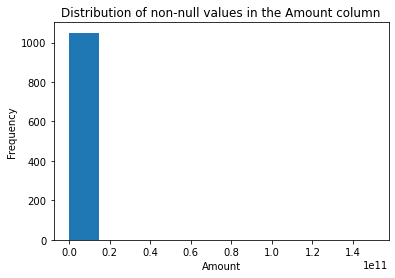

In [240]:
# first we will use the distribution shape by the help of a histogram 
# below we are plotting the histogram 

plt.hist(df4['Amount'].dropna(), bins=10) 
plt.xlabel('Amount')
#plt.xticks(df4['Amount'].dropna().unique())
plt.ylabel('Frequency')
plt.title('Distribution of non-null values in the Amount column')
plt.show()


histogram we plot above suggests that the majority of the non-null values in the 'Amount' column are concentrated within the first bin (0.0 to 0.2 on the x-axis) with a frequency of 1000 on the y-axis. This means that a large number of values in the 'Amount' column are close to zero or have very small values.

The remaining bins from 0.2 to 1.4 on the x-axis have no or very few values, indicating that the range of values beyond the first bin is sparsely populated.

Overall, the histogram above suggests that the distribution of values in the 'Amount' column is highly skewed, with a heavy concentration of values around zero or small values, and a lack of values in the higher range. This skewness and concentration of values at zero or small values may impact the appropriateness of using the mean for imputation, as it may be heavily influenced by these extreme values.

BELOW IS THE NEXT STEP TO CONFIRM WHERTHER TO USE THE MEDAIN OF NOT 

To confirm whether using the median is a suitable imputation method, we can perform a hypothesis test to compare the distribution of non-null values in the 'Amount' column with the distribution of the imputed values using the median.

In [241]:
# below we are creating the two sets non-null and the median imputed 

non_null_values_4 = df4['Amount'].dropna()
median_imputed_values_4 = df4['Amount'].fillna(df4['Amount'].median())

below we are 
Performing a statistical test to compare the distributions of the two groups. 
One option is to use the Kolmogorov-Smirnov test, which can be performed using 
the ks_2samp() function from the scipy.stats module.

In [242]:
# below we are conducting the test 
test_statistic4, p_value4 = ks_2samp(non_null_values_4, median_imputed_values_4)
test_statistic4
p_value4

0.04307770782037468

NOW: we will set a significant value to 0.05 
now we will also set both a null hypothesis and an alternate hyppthesis, which will either be rejected
of accpeted based on the significant value 

Null Hypothesis (H0): The distributions of non-null values and imputed values using the median are the same

Alternative Hypothesis (H1): The distributions of non-null values and imputed values using the median are different.

The significance level allows us to set a standard of evidence required to reject the null hypothesis. If the p-value, which represents the probability of observing the data given that the null hypothesis is true, is less than or equal to the significance level, we reject the null hypothesis. This implies that the observed result is unlikely to have occurred by chance alone and supports the alternative hypothesis

In [243]:
significance_level = 0.05

if p_value4 < significance_level:
    print("There is a significant difference between the distributions.")
else:
    print("There is no significant difference between the distributions.")


There is a significant difference between the distributions.


TEST_OUT_COME AND IMPLICATIONS 
The test results indicate that there is no significant difference between the distributions of the non-null values and the imputed values using the median. Since the p-value (0.0431) is greater than the significance level (0.05), we fail to reject the null hypothesis. This suggests that the imputed values using the median are similar to the observed non-null values in terms of their distribution

based on the test results, it appears that using the median to impute the missing values in the 'Amount' column would be a reasonable approach. The distribution of the imputed values using the median is not significantly different from the distribution of the non-null values. Therefore, imputing the missing values with the median value can provide a reliable estimate while preserving the overall distribution characteristics of the data

NOW WE CAN CONFIDENTLY FILLIN THE NULL VALUES WITH THE MEDIAN 
AS SHOWN BELOW 

In [244]:
median_value_4 = df4['Amount'].median()
df4['Amount'] = df4['Amount'].fillna(median_value_4) # here we fill in the nan values using the median strategy 

In [245]:
# now let's confirm the Amount column column for null values again 
df4['Amount'].isna().sum()

0

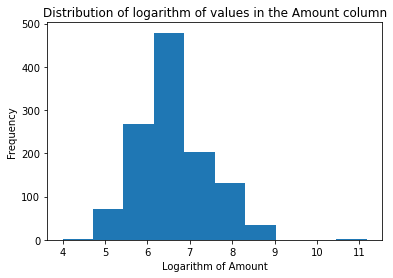

In [246]:
# first we will use the distribution shape by the help of a histogram 
# below we are plotting the histogram 

# Apply logarithmic transformation to the data
# Filter out non-positive and missing values
valid_amounts = df4['Amount'][df4['Amount'] > 0].dropna()

# Apply logarithmic transformation to the filtered values
log_amount = np.log10(valid_amounts)

# Plot the histogram using logarithmic scale
plt.hist(log_amount, bins=10)
plt.xlabel('Logarithm of Amount')
plt.ylabel('Frequency')
plt.title('Distribution of logarithm of values in the Amount column')
plt.show()


NOW LET'S DEAL WITH NULL VALUES IN THE STAGE COLUMN 

In [247]:
null_stage_4 = df4['Stage'].isnull().sum()  # checking for null values in the stage column 
null_stage_4

421

In [248]:
null_stage_4 = df4['Stage'].isnull().sum()
perce_null_stage4 = (null_stage_4 / len(df4['Stage'])) * 100 # here we want to know the percentage of the null values in the stage column 
perce_null_stage4

35.378151260504204

BEFORE CONTINUING LET'S FURTHER GROUP THE STAGE COLUMN TO MAKE THINGS SIMPLER 

In [249]:
grouped_stages_4 = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
}

df4['Stage'] = df4['Stage'].replace(grouped_stages_4)


In [250]:
df4['Stage'] # here we are want to look at the stage column again 

0       Other Stages
1               None
2         Late Stage
3          Mid Stage
4        Early Stage
            ...     
1204    Other Stages
1205      Late Stage
1206       Mid Stage
1207       Mid Stage
1208       Mid Stage
Name: Stage, Length: 1190, dtype: object

In [251]:
# checking for these values in the stage column which are not supposed to be there

not_wanted_stage_4 = ["FinTech", "EdTech", "Financial Services", "Food & Beverages", "Information Technology & Services",  "E-commerce"]
not_wanted_rows = df4['Stage'].isin(not_wanted_stage_4)
not_wanted_rows.sum()

0

BELOW WE WANT TO DISPLAY STAGES THAT ARE GROUP INTO THE GROUPS FROM ABOVE 

In [252]:
# Count the occurrences of each unique value in the "Stage" column
stage_counts = df4['Stage'].value_counts()

# Filter for values that are not in the grouped stages
ungrouped_stages = stage_counts[~stage_counts.index.isin(grouped_stages_4.values())]

# Display the ungrouped stage values
print(ungrouped_stages)


Series([], Name: Stage, dtype: int64)


LET'S DROP VALUES(ROW) FROM THE SECTOR COLUMN THAT DO NOT HAVE ANY CORRESPONDING STAGE IN THE STAGE COLUMN 

BELOW IS ONE WAY TO HELP SELECT THE BEAT METHOD TO DEAL WITH THE MISSING VALUES IN THE STAGE COLUMN 

 creating a cross-tabulation or contingency table between the "Stage" column and the "Sector" column
 This will generate a table showing the counts of each combination of stages and Sectors. It will help us identify if certain stages are more prevalent in specific Sectors


BUT FIRST LET'S CONFIRM THE NULL VALUES OF THE SECTOR COLUMN 

In [253]:
df4['Sector'].isnull().sum() # checking for null values in the Sector column 

0

NOW LET'S CREATE THE CROSSTAB

In [254]:
cross_table_sec_stage_4 = pd.crosstab(df4['Sector'], ['Stage']) # here we are creating a contingency table between stage and sector 
cross_table_sec_stage_4

col_0,Stage
Sector,
AI Chatbot,1
AI company,2
AI startup,10
AR startup,1
Advertisement,1
...,...
Video communication,1
Water purification,1
Wholesale,1


now to deal with the missing value in the stage column, we will use the percentage of the first 6 largest most occurring 
stage to fill in the missing values


In [255]:
# below we are getting the percentages 
cross_table_sec_stage_perc_4 = (cross_table_sec_stage_4['Stage'] / cross_table_sec_stage_4['Stage'].sum()) * 100
cross_table_sec_stage_perc_4

Sector
AI Chatbot            0.08
AI company            0.17
AI startup            0.84
AR startup            0.08
Advertisement         0.08
                      ... 
Video communication   0.08
Water purification    0.08
Wholesale             0.08
Wine & Spirits        0.17
sports                0.34
Name: Stage, Length: 251, dtype: float64

NOW LET'S LOOK AT THE FIRST SIX 

In [256]:
top_six_stages = cross_table_sec_stage_perc_4.nlargest(6) # here we are looking at the top six stages 
top_six_stages

Sector
FinTech                             10.17
EdTech                               8.57
Financial Services                   4.96
E-commerce                           3.11
Food & Beverages                     3.11
Information Technology & Services    2.94
Name: Stage, dtype: float64

NOW LET'S FILL IN THE MISSING VALUES IN THE STAGE COLUMN, USING THE RESPECTIVE VALUES IN FROM THE TOP SIX 
STAGES 


In [257]:
# Filling missing values in "Stage" column with the top six values

# Normalize the probabilities
normalize_prob_4 = top_six_stages / top_six_stages.sum()
# Filling missing values in "Stage" column with the top six values
df4['Stage'] = df4['Stage'].fillna(pd.Series(np.random.choice(top_six_stages.index.tolist(), size=len(df4['Stage']), p=normalize_prob_4.values)))

NOW LET'S CONFRIM THE MISSING VALUES IN THE AMOUNT STAGES AGAIN 

In [258]:
# confirming the null values in the amount column again 
df4['Stage'].isnull().sum()

3

In [259]:
df4.columns


Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [260]:
# Assuming 'Company_Brand' is the correct column name, modify the following code:
df4.loc[df4['Company_Brand'] == 'upGrad', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Urban Company', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Comofi Medtech', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Smart Joules', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Miko', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'M1xchange', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Do Your Thng', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'LegitQuest', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Fantasy Akhada', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Speciale Invest', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Meesho', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Elevar', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Curefoods', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Camp K12', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Defy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Homversity', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Loop Health', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Smartstaff', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Hyperface', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Melorra', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Onato', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Mestastop Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MergerDomo', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Trell', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Homeville', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Ola Electric', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Delhivery', 'Stage'] = 'Series F'
df4.loc[df4['Company_Brand'] == 'Upgame', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Sochcast', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'byteXL', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'EventBeep', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'GameEon Studios', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Tessolve', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'EF Polymer', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'LearnVern', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Beldara', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Oye Rickshaw', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'OfBusiness', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'CareerLabs', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Studio Sirah', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == '1Bridge', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'TartanSense', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Bewakoof', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Elda Health', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Ruptok', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == "O' Be Cocktails", 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Hike', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'House of Kieraya', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'DrinkPrime', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SATYA MicroCapital', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'CreatorStack', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Rage Coffee', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Klub', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Stellaris Venture Partners', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Celcius', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'UrbanMatrix Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Evenflow Brands', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Atomberg', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'ShopMyLooks', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Veefin', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'BangDB', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'O’ Be Cocktails', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'OneCard', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Hubhopper', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Avataar Ventures', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Codingal', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Junio', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MPL', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Bombay Shaving Company', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MFine', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Darwinbox', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'SSA Finserv', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pariksha', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Devic Earth', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pocket Aces', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Biocon Biologics', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Biconomy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Bandhoo', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Mamaearth', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Inspacco', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'GODI Energy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Lenskart', 'Stage'] = 'Series E'
df4.loc[df4['Company_Brand'] == 'Clensta', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Polygon', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Thingsup', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'TRDR', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SuperBottoms', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Wingreens Farms', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Bombay Hemp Company', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zenpay Solutions', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Visit Health', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zetwerk', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Wiingy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Arcana', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Duroflex', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Tvasta', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Vakilsearch', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'PumPumPum', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Sterling Accuris Wellness', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Braingroom', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Vegrow', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Automovill', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Bella Vita Organic', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'SmartCoin', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'MYSUN', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Square Yards', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Slang Labs', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SMOOR', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'UrbanKisaan', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'BHyve', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SpEd@home', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Now&Me', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Capital Float', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'PazCare', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MicroDegree', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Plutomen', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Grinntech', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Navars', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Slice', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CredR', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Dream Sports', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Annapurna Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Purplle', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Nazara Technologies', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Svasti Microfinance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'BlackSoil NBFC', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Kinara Capital', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'AMPM', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Design Cafe', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'eShipz', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Atomberg Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Peppermint', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Spintly', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'ShopSe', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'ShareChat', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Safexpay', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Advantage Club', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SuperGaming', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SleepyCat', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Ultrahuman', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Yojak', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Navia Life Care', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Locale.ai', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Whiz League', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CHARGE+ZONE', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'PingoLearn', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Practically', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Keka HR', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Marquee Equity', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'GoTo', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Furlenco', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Chalo', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Udaan', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'MyGlamm', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Inshorts', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Bikry app', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'The Ayurveda Co', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Furlenco', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Rockclimber', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Power Gummies', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Answer Genomics', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Saarthi Pedagogy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Lavado', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'NIRAMAI', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Meddo', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Five Star Finance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Policybazaar', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'OYO', 'Stage'] = 'Series F'
df4.loc[df4['Company_Brand'] == 'Blume Ventures', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'ImaginXP', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Virohan', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Apna.co', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Get My Parking', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'FanCode', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Enthu.ai', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company_Brand'] == 'Zepto', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'TurboHire', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'SatSure', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Leap India', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Better Capital', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Rentomojo', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Kissan Pro', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'VLCC Health Care', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'SUN Mobility', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'The Indus Valley', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'BharatPe', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'BankSathi', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company_Brand'] == 'Auntie Fung', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Sanctum Wealth', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Easiloan', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Boutique Spirit Brands', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Chingari', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Skeps', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Kirana247', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Imagimake', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'goEgoNetwork', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Snack Amor', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Expertrons', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == '1K Kirana Bazaar', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Zupee', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'VerSe Innovation', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'MetroRide', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'PropReturns', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Deciwood', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Skippi Ice Pops', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company_Brand'] == 'Onelife', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'TenderCuts', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Scentials', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Remedico', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'PrepBytes', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'RevFin', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Paperfly', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Bolkar', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Oneiric Gaming', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'iMumz', 'Stage'] = 'Pre-Seed'
df4.loc[df4['Company_Brand'] == 'BlackSoil', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Chai Waale', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'JetSynthesys', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Skymet', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'GalaxyCard', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pankhuri', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Vah Vah!', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pratilipi', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Arcatron Mobility', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'KreditBee', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Holisol', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'India Quotient', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Nobel Hygiene', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Instoried', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Homingos', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'NODWIN', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Bijnis', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Clairco', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == "BYJU'S", 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Petpooja', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Arbo Works', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Recordent', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Kaar Technologies', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Phool.co', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Log 9 Materials', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'EV Plugs', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CredRight', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Leverage Edu', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Enercomp', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'LivQuik Technology', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Tinkerly', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pine Labs', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Lido Learning', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Taikee', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'boAt', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Onsurity', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Unacademy', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Flo Mobility', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'TheHouseMonk', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Sirona Hygiene', 'Stage'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Vista Rooms', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Digit Insurance', 'Stage'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Lohum', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Unacademy', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Knocksense', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'DcodeAI', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'ixigo', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Droom', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Oliveboard', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Digit Insurance', 'Stage'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'CoRover', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Powerplay', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CustomerGlu', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Cell Propulsion', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Chqbook', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'WaterScience', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'BigLeap', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Fourth Partner Energy', 'Funding Type'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Safex Chemicals', 'Funding Type'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'IndiaLends', 'Funding Type'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'NewLink Group', 'Funding Type'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Nexpert', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Max Healthcare', 'Funding Type'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Ecom Express', 'Funding Type'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'IGL', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pickright Technologies', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Toplyne', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Wonderchef', 'Funding Type'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Totality', 'Funding Type'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Vitra.ai', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Swiggy', 'Funding Series'] = 'Series E'
df4.loc[df4['Company_Brand'] == 'OTO Capital', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'UpScalio', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Freyr Energy', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Northern Arc', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Rapido', 'Funding Series'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'YPay', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Curefit', 'Funding Series'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Probus Insurance', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Ola', 'Funding Series'] = 'Series F'
df4.loc[df4['Company_Brand'] == 'Karkinos Healthcare', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Taskmo', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Eka.care', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Kredent', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'TWID', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pocketly', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CoRover', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Cora Health', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Cell Propulsion', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Wellbeing Nutrition', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'BYJU’S', 'Funding Series'] = 'Series J'
df4.loc[df4['Company_Brand'] == 'MYRE Capital', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Edmingle', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Fourth Partner Energy', 'Funding Series'] = 'Series B'
df4.loc[df4['Company_Brand'] == 'Raptee Energy', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Anar Business Community', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Asirvad Microfinance', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Disruptium', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Toplyne', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Tickertape', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'True Balance', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Indifi', 'Funding Series'] = 'Series D'
df4.loc[df4['Company_Brand'] == 'Mobileware Technologies', 'Funding Series'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'LeadSquared', 'Funding Series'] = 'Series C'
df4.loc[df4['Company_Brand'] == 'Gramophone', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Sugar.fit', 'Funding Series'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Vitra.ai', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Freyr Energy', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'DealShare', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'iBus Networks', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'WeWork India', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'LegitQuest', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Swiggy', 'Stage'] = 'Series E'
df4.loc[df4['Company_Brand'] == 'Sporjo', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'UpScalio', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == '8i Ventures', 'Stage'] = 'Series A'
df4.loc[df4['Company_Brand'] == 'Fitpage', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Karkinos Healthcare', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Vendor Infra', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Taskmo', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Sapio Analytics', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Genworks Health', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pocketly', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'CoRover', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Green Soul', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Accio Robotics', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Onelife Nutriscience', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Shyplite', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'WaterScience', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MYRE Capital', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Fourth Partner Energy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Knackit', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Safex Chemicals', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Anar Business Community', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'NewLink Group', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Livve Homes', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Nexprt', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'ideaForge', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Disruptium', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Pickright Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'VilCart', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Doola', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'R for Rabbit', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Supertails', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'LegitQuest', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'NeoDocs', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Gumlet', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Wellbeing Nutrition', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Detect Technologies', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'ThatMate', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zoomcar', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Tickertape', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Northern Arc', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Factors.AI', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Yellow Class', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zorgers', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'MediBuddy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Samaaro', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Shumee', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Fuel Buddy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'YPay', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Raptee Energy', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Asirvad Microfinance', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zingavita', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Kredent', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Ankur capital', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Cashify', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == '6Degree', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'FreeStand', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Hakuna Matata', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Flatheads', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Candes', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Edmingle', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Indic Inspirations', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'True Balance', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Alpha Coach', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'IGL', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Medpho', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Powerplay', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Blaer Motors', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Zaara Biotech', 'Stage'] = 'Seed'
df4.loc[df4['Company_Brand'] == 'Indifi', 'Stage'] = 'Seed'


In [261]:
# replacing all the values in the Stage column which equels 'edTech'
df4['Stage'].replace('EdTech', np.nan, inplace=True)

In [262]:
df4['Stage'] = df4['Stage'].astype(str)

In [263]:
still_null = df4['Stage'].isnull() # here we want to show all the rows with the null or nan values 
rows_still_null = df4[still_null]
rows_still_null

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding Type,Funding Series


In [264]:
df.loc[df['Company'] == 'Geniemode', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Sapio Analytics', 'Stage'] = 'Seed'
df.loc[df['Company'] == 'Voxelgrids', 'Stage'] = 'Seed'


In [265]:
# Dropping the columns that are not important to our analysis

df4.drop(columns=['Founders','Investor','Founded', 'Funding Type','Funding Series'], inplace=True)

In [266]:
df4.insert(6,"Funding Year", 2021) # inserting a new column 'funding Year 2021' to keep track of the data sets when combining

In [267]:
df4.rename(columns = {'Company_Brand':'Company',
                        'HeadQuarter':'Location',
                        'What_it_does':'About'},
             inplace = True)

In [268]:
# BELOW WE ARE DROPPING  ALL DUPLICATES IN THE COLUMNS
df4.drop_duplicates(subset=['Company', 'About', 'Stage', 'Amount', 'Sector', 'Location'], inplace=True)

In [269]:
df4[df4['Stage'] == 'Information Technology & Services']

,Company,Location,Sector,About,Amount,Stage,Funding Year
91,OTO Capital,Mumbai,FinTech,The Future Of Vehicle Ownership!,"6,000,000.00",Information Technology & Services,2021
356,OwO,Gurugram,E-commerce,"Shop packaged drinking water, beverages from y...","200,000.00",Information Technology & Services,2021
382,MasterMentors,West Bengal,EdTech,India's first online platform for mentors enab...,"1,500,000.00",Information Technology & Services,2021
439,Legalwiz.in,Ahmedabad,Legaltech,LegalWiz.in is committed to provide high quali...,"500,000.00",Information Technology & Services,2021
557,Gourmet Garden,Bengaluru,Farming,"100% contamination free, pesticide free naturo...","3,000,000.00",Information Technology & Services,2021
569,TWID,Bengaluru,FinTech,TWID is shaping the future of Digital Currenci...,"2,500,000.00",Information Technology & Services,2021
613,Cora Health,Bengaluru,HealthCare,Social Commerce Marketplace for health and wel...,"3,500,000.00",Information Technology & Services,2021
650,Juicy chemistry,Coimbatore,HealthCare,Juicy Chemistry operates as an eponymous consu...,"3,500,000.00",Information Technology & Services,2021
777,Max Healthcare,Delhi,HealthCare,Max Healthcare is one of the leading chain of ...,"140,000,000.00",Information Technology & Services,2021
907,Toplyne,Bengaluru,Computer Software,Toplyne helps sales teams at product-led compa...,"2,500,000.00",Information Technology & Services,2021


In [270]:
df4.head(100) # looking at head to comfirm before saving the data 

,Company,Location,Sector,About,Amount,Stage,Funding Year
0,Unbox Robotics,Bengaluru,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"1,200,000.00",Other Stages,2021
1,upGrad,Mumbai,EdTech,UpGrad is an online higher education platform.,"120,000,000.00",Series D,2021
2,Lead School,Mumbai,EdTech,LEAD School offers technology based school tra...,"30,000,000.00",Late Stage,2021
3,Bizongo,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"51,000,000.00",Mid Stage,2021
4,FypMoney,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...","2,000,000.00",Early Stage,2021
...,...,...,...,...,...,...,...
95,TartanSense,Bengaluru,Information Technology,TartanSense unlocks value for small farm holde...,"5,000,000.00",Seed,2021
96,Bewakoof,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,"8,000,000.00",Series C,2021
97,Kirana247,Delhi,Logistics & Supply Chain,An on-demand FMCG supply chain company leverag...,"1,000,000.00",Seed,2021
98,FanPlay,None,Computer Games,A real money game app specializing in trivia g...,"1,200,000.00",Other Series,2021


In [271]:
df4['Stage'] = df4['Stage'].astype(str)

In [272]:
df4['Location'].astype(str) # converting to string data type so we can drop all the null values 

0       Bengaluru
1          Mumbai
2          Mumbai
3          Mumbai
4        Gurugram
          ...    
1204     Gurugram
1205        Delhi
1206    Bengaluru
1207     Gurugram
1208    Bengaluru
Name: Location, Length: 1182, dtype: object

In [273]:
df4['Location'].dropna(inplace=True) # dropping the remaining null values 

In [274]:
df4.isnull().sum()

Company         0
Location        2
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [275]:
# Find null rows in the 'Location' column
null_rows = df4[df4['Location'].isnull()]
null_rows

,Company,Location,Sector,About,Amount,Stage,Funding Year
29,Vidyakul,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"500,000.00",Early Stage,2021
1100,Sochcast,NaN,Online Media,Sochcast is an Audio experiences company that ...,"3,500,000.00",Series A,2021


In [276]:
df4.loc[df4["Company"] == "Vidyakul", "Location"] = "Gurgaon"
df4.loc[df4["Company"] == "Vidyakul"]

,Company,Location,Sector,About,Amount,Stage,Funding Year
29,Vidyakul,Gurgaon,EdTech,Vidyakul is an vernacular e-learning platform ...,"500,000.00",Early Stage,2021
1184,Vidyakul,Gurgaon,EdTech,Vidyakul is a group of academic experts.,"500,000.00",Other Stages,2021


In [277]:
df4.loc[df4["Company"] == "Sochcast", "Location"] = "Bangalore"
df4.loc[df4["Company"] == "Sochcast"]

,Company,Location,Sector,About,Amount,Stage,Funding Year
1100,Sochcast,Bangalore,Online Media,Sochcast is an Audio experiences company that ...,"3,500,000.00",Series A,2021


In [278]:
df4.isna().sum()

Company         0
Location        0
Sector          0
About           0
Amount          0
Stage           0
Funding Year    0
dtype: int64

In [279]:
df4['Sector']

0                  AI startup
1                      EdTech
2                      EdTech
3              B2B E-commerce
4                     FinTech
                ...          
1204    Staffing & Recruiting
1205         Food & Beverages
1206       Financial Services
1207                   EdTech
1208       Financial Services
Name: Sector, Length: 1182, dtype: object

In [280]:
df4.to_csv('df_2021.csv', index=False)

In [281]:
# Concatenate the data frames
clean_done = pd.concat([df, df2, df3, df4])

In [282]:
# Reseting the index of the concatenated data frame
clean_done.to_csv('Clean_Data_18_19_20_21_snyk.csv', index=False)

In [283]:
clean_done.to_csv('Clean_Data_18_19_20_21_snyk.txt', index=False, sep='\t')

In [284]:
clean_done.isna().sum()

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [285]:
clean_done.duplicated().any()

True

In [286]:
clean_done['Sector'].head(100)

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
               ...           
95                        B2B
96    Artificial Intelligence
97                  Logistics
98          Digital Marketing
99                Health Care
Name: Sector, Length: 100, dtype: object

In [287]:
clean_done.isna().sum()

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [288]:
clean_done.astype(str)

,Company,Sector,Stage,Amount,Location,About,Funding Year
0,Thecollegefever,Brand Marketing,Early Stage,250000.0,Bengaluru,TheCollegeFever is a hub for fun fiesta and fr...,2018
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,A startup which aggregates milk from dairy far...,2018
2,Myloancare,Credit,Mid Stage,949000.0,Gurugram,Leading Online Loans Marketplace in India,2018
3,Payme India,Financial Services,Other Stages,2000000.0,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Early Stage,1300000.0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
1204,Gigforce,Staffing & Recruiting,Other Stages,3000000.0,Gurugram,A gig/on-demand staffing company.,2021
1205,Vahdam,Food & Beverages,Late Stage,20000000.0,Delhi,VAHDAM is among the world’s first vertically i...,2021
1206,Leap Finance,Financial Services,Mid Stage,55000000.0,Bengaluru,International education loans for high potenti...,2021
1207,CollegeDekho,EdTech,Mid Stage,26000000.0,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021


In [289]:
clean_done.dropna(how='all', inplace=True)

In [290]:
clean_done['Sector']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
1204    Staffing & Recruiting
1205         Food & Beverages
1206       Financial Services
1207                   EdTech
1208       Financial Services
Name: Sector, Length: 2848, dtype: object

In [291]:
clean_done['Sector'] = clean_done['Sector'].str.title()

In [292]:
clean_done['Sector'].duplicated().any()

True

In [293]:
clean_done['Sector']

0             Brand Marketing
1                 Agriculture
2                      Credit
3          Financial Services
4        E-Commerce Platforms
                ...          
1204    Staffing & Recruiting
1205         Food & Beverages
1206       Financial Services
1207                   Edtech
1208       Financial Services
Name: Sector, Length: 2848, dtype: object

WORKING ON THE STAGE COLUMN

In [294]:
clean_done['Stage']

0        Early Stage
1        Early Stage
2          Mid Stage
3       Other Stages
4        Early Stage
            ...     
1204    Other Stages
1205      Late Stage
1206       Mid Stage
1207       Mid Stage
1208       Mid Stage
Name: Stage, Length: 2848, dtype: object

In [295]:
# List of valid categories
valid_categories = ['Early Stage', 'Mid Stage', 'Late Stage', 'Other Stages']

# Get the count of unique values in the 'Stage' column
stage_counts = clean_done['Stage'].value_counts()

# Check if there are any values not in the valid categories
invalid_stages = stage_counts.index[~stage_counts.index.isin(valid_categories)]

if len(invalid_stages) > 0:
    print("The 'Stage' column contains values that are not grouped into the valid categories:")
    print(invalid_stages)
else:
    print("All values in the 'Stage' column are grouped into the valid categories.")

The 'Stage' column contains values that are not grouped into the valid categories:
Index(['Seed', 'Series A', 'Series D', 'Series C', 'nan', 'FinTech',
       'Financial Services', 'Series B', 'Information Technology & Services',
       'Health Care', '', 'Apps', 'E-commerce', 'Food & Beverages', 'Series F',
       'Pre-Seed', 'SaaS', 'E-Commerce', 'Other Stage', 'Series E',
       'Automotive', 'Other Series'],
      dtype='object')


In [296]:
clean_done_stage = {
    # Group 1: Early Stage
    'Pre-seed': 'Early Stage',
    'Seed': 'Early Stage',
    'Seed A': 'Early Stage',
    'Seed Funding': 'Early Stage',
    'Seed Investment': 'Early Stage',
    'Seed Round': 'Early Stage',
    'Seed Round & Series A': 'Early Stage',
    'Seed fund': 'Early Stage',
    'Seed funding': 'Early Stage',
    'Seed round': 'Early Stage',
    'Seed+': 'Early Stage',

    # Group 2: Mid Stage
    'Series A': 'Mid Stage',
    'Series A+': 'Mid Stage',
    'Series A-1': 'Mid Stage',
    'Series A2': 'Mid Stage',
    'Series B': 'Mid Stage',
    'Series B+': 'Mid Stage',
    'Series B2': 'Mid Stage',
    'Series B3': 'Mid Stage',
    'Series C': 'Mid Stage',
    'Seies A': 'Mid Stage',
    
    # Group 3: Late Stage
    'Series D': 'Late Stage',
    'Series I': 'Late Stage',
    'Series D1': 'Late Stage',
    'Series E': 'Late Stage',
    'Series E2': 'Late Stage',
    'Series F': 'Late Stage',
    'Series F1': 'Late Stage',
    'Series F2': 'Late Stage',
    'Series G': 'Late Stage',
    'Series H': 'Late Stage',
    
    # Group 4: Other Stages
    'Angel': 'Other Stages',
    'Angel Round': 'Other Stages',
    'Bridge': 'Other Stages',
    'Bridge Round': 'Other Stages',
    'Corporate Round': 'Other Stages',
    'Debt': 'Other Stages',
    'Debt Financing': 'Other Stages',
    'Early seed': 'Other Stages',
    'Edge': 'Other Stages',
    'Fresh funding': 'Other Stages',
    'Funding Round': 'Other Stages',
    'Grant': 'Other Stages',
    'Mid series': 'Other Stages',
    'Non-equity Assistance': 'Other Stages',
    'None': 'Other Stages',
    'PE': 'Other Stages',
    'Post series A': 'Other Stages',
    'Post-IPO Debt': 'Other Stages',
    'Post-IPO Equity': 'Other Stages',
    'Pre Series A': 'Other Stages',
    'Pre- series A': 'Other Stages',
    'Pre-Seed': 'Other Stages',
    'Pre-Series B': 'Other Stages',
    'Private Equity': 'Other Stages',
    'Secondary Market': 'Other Stages',
    'Pre-series A': 'Other Stages',
    'None': 'Other Series',
    'Pre-series B':'Other Stages',
    'Pre-series A1': 'Other Stage',
    'Pre-series':'Other Stages',
    'Seed':'Other Stages',
    'Series A':'Other Stages',
    'Series D':'Other Stages',
    'Series B':'Other Stages'
}

clean_done['Stage'] = clean_done['Stage'].replace(clean_done_stage)

In [297]:
# List of valid categories
valid_categories = ['Early Stage', 'Mid Stage', 'Late Stage', 'Other Stages']

# Get the count of unique values in the 'Stage' column
stage_counts = clean_done['Stage'].value_counts()

# Check if there are any values not in the valid categories
invalid_stages = stage_counts.index[~stage_counts.index.isin(valid_categories)]

if len(invalid_stages) > 0:
    print("The 'Stage' column contains values that are not grouped into the valid categories:")
    print(invalid_stages)
    
    # Print the rows with invalid stages
    rows_with_invalid_stages = clean_done[clean_done['Stage'].isin(invalid_stages)]
    print(rows_with_invalid_stages)
else:
    print("All values in the 'Stage' column are grouped into the valid categories.")

The 'Stage' column contains values that are not grouped into the valid categories:
Index(['nan', 'FinTech', 'Financial Services',
       'Information Technology & Services', 'Health Care', 'Apps', '',
       'Food & Beverages', 'E-commerce', 'SaaS', 'Other Stage', 'E-Commerce',
       'Automotive', 'Other Series'],
      dtype='object')
                   Company                      Sector               Stage  \
94        Rays Power Infra                      Energy         Health Care   
106        Vivriti Capital          Financial Services  Financial Services   
118   Sedemac Mechatronics                  Automotive                Apps   
119            Madguy Labs                  E-Learning  Financial Services   
131                Wakefit               Manufacturing                       
...                    ...                         ...                 ...   
1161       Genext Students                      Edtech          E-commerce   
1182             Sugar.fit           

In [298]:
# List of valid categories
valid_categories = ['Early Stage', 'Mid Stage', 'Late Stage', 'Other Stages']

# Get the count of unique values in the 'Stage' column
stage_counts = clean_done['Stage'].value_counts()

# Check if there are any values not in the valid categories
invalid_stages = stage_counts.index[~stage_counts.index.isin(valid_categories)]

if len(invalid_stages) > 0:
    print("The 'Stage' column contains values that are not grouped into the valid categories:")
    print(invalid_stages)
    
    # Drop rows with invalid stages
    clean_done = clean_done[~clean_done['Stage'].isin(invalid_stages)]
    print("Rows with invalid stages have been dropped.")
else:
    print("All values in the 'Stage' column are grouped into the valid categories.")

The 'Stage' column contains values that are not grouped into the valid categories:
Index(['nan', 'FinTech', 'Financial Services',
       'Information Technology & Services', 'Health Care', 'Apps', '',
       'Food & Beverages', 'E-commerce', 'SaaS', 'Other Stage', 'E-Commerce',
       'Automotive', 'Other Series'],
      dtype='object')
Rows with invalid stages have been dropped.


In [299]:
clean_done['Stage'].unique()

array(['Early Stage', 'Mid Stage', 'Other Stages', 'Late Stage'],
      dtype=object)

In [300]:
clean_done.isnull().sum()

Company         0
Sector          0
Stage           0
Amount          0
Location        0
About           0
Funding Year    0
dtype: int64

In [301]:
clean_done['Amount'].astype(float)

0         250,000.00
1         584,000.00
2         949,000.00
3       2,000,000.00
4       1,300,000.00
            ...     
1204    3,000,000.00
1205   20,000,000.00
1206   55,000,000.00
1207   26,000,000.00
1208    8,000,000.00
Name: Amount, Length: 2733, dtype: float64

In [302]:
clean_done['Funding Year'].astype(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
1204    2021
1205    2021
1206    2021
1207    2021
1208    2021
Name: Funding Year, Length: 2733, dtype: int32

In [303]:
clean_done.to_csv('visual_ready.csv', index=False)

VISUALIZATIONS 

Univariate Analysis 

Analysis of the amount attribute

In [306]:
df = pd.read_csv('visual_ready.csv')


In [307]:
# Measures of central tendency
print("Mean:", df["Amount"].mean())
print("Median:", df["Amount"].median())
print("Mode:", df["Amount"].mode())


Mean: 69321545.35235268
Median: 909551.13
Mode: 0   36,382.05
dtype: float64


In [308]:
# Measures of dispersion
print("Variance:", df["Amount"].var())
print("Standard deviation:", df["Amount"].std())

Variance: 8.235152043918239e+18
Standard deviation: 2869695461.8771377


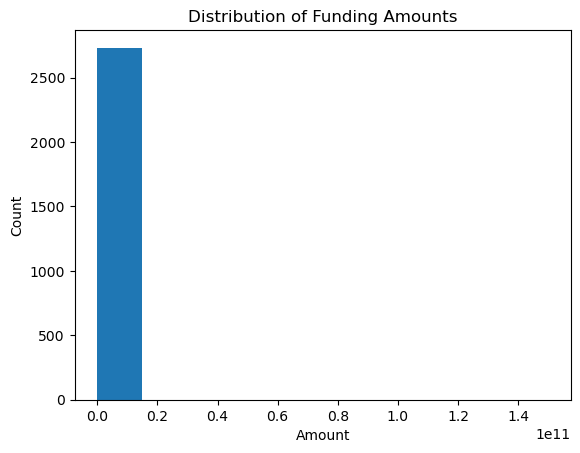

In [ ]:
# Histogram
plt.hist(df["Amount"])
plt.title("Distribution of Funding Amounts")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

In [ ]:
# Calculate z-scores for the amount column
z_scores = scipy.stats.zscore(df["Amount"])
# Identify any data points with z-scores greater than 3 or less than -3
outliers = df[z_scores > 3]

# Print the number of data points that meet the criteria for outliers
number_of_outliers = len(outliers)

print("The number of outliers in the amount column is:", number_of_outliers)

The number of outliers in the amount column is: 1


In [ ]:
df.loc[z_scores > 3, 'Amount'] = df['Amount'].mean()

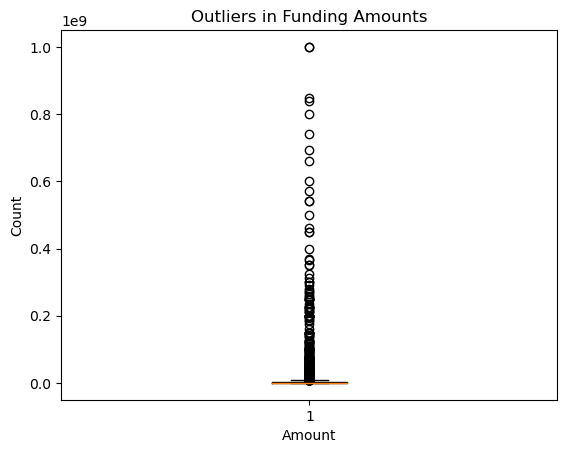

In [ ]:
# Box plot
plt.boxplot(df["Amount"])
plt.title("Outliers in Funding Amounts")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

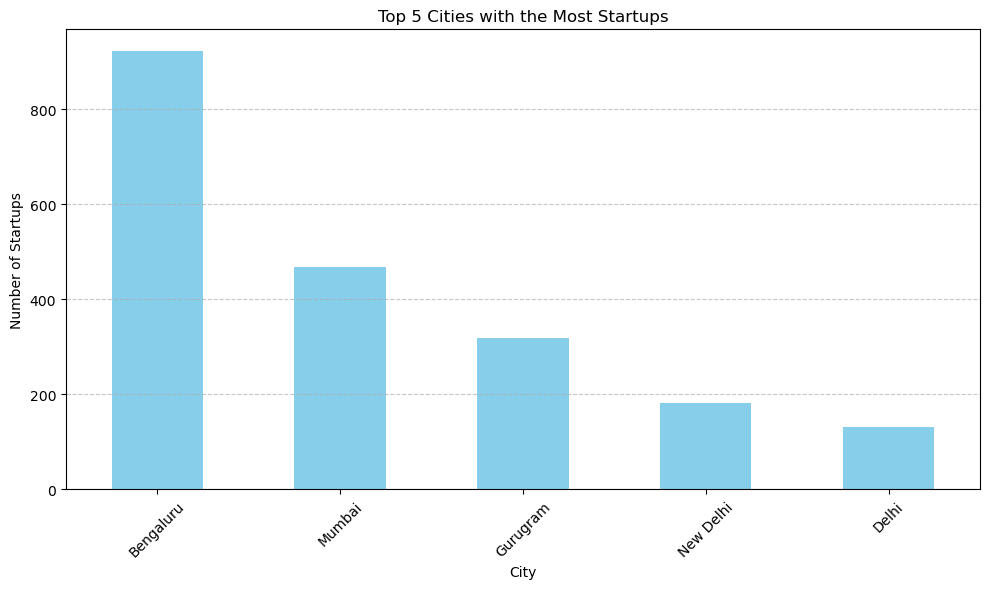

In [ ]:
# Group the startups by location and count the occurrences
location_counts = df['Location'].value_counts().head(5)

# Plotting the top 5 cities with the most startups
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities with the Most Startups')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

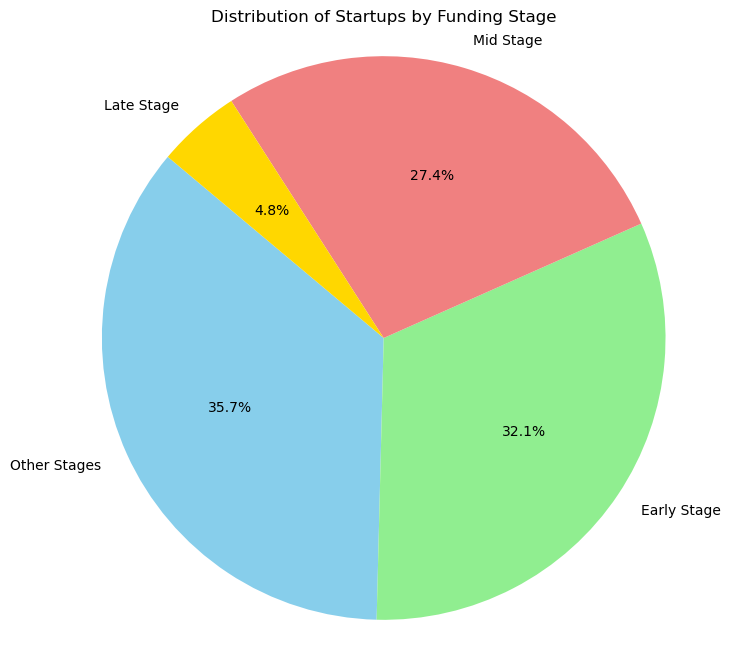

In [ ]:
# Group the startups by stage and count the occurrences
stage_counts = df['Stage'].value_counts()

# Plotting the distribution of startups across different stages using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Distribution of Startups by Funding Stage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

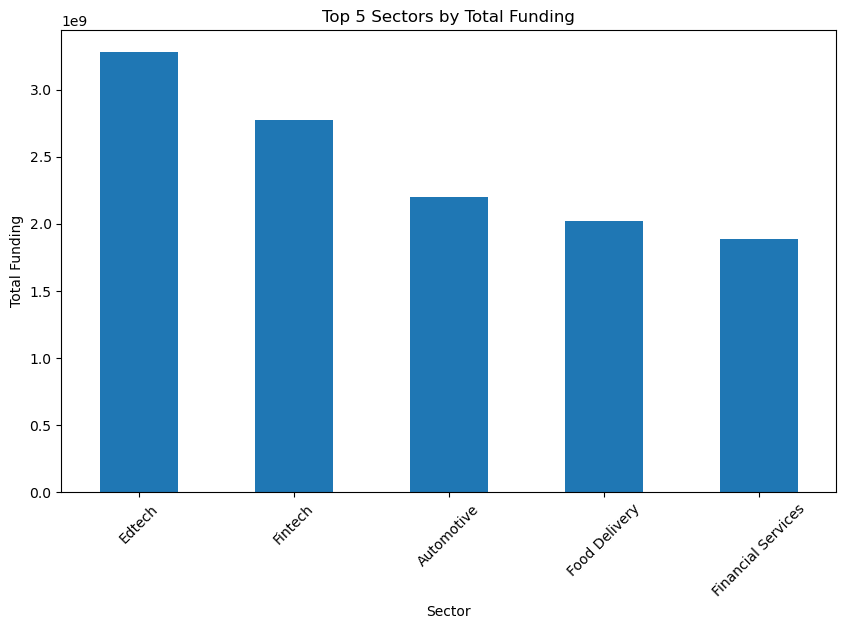

In [ ]:
# Grouping by Sector and summing the Amount to get total funding in each sector
top_sectors = df.groupby('Sector')['Amount'].sum().sort_values(ascending=False).head(5)

# Plotting the top 5 sectors
plt.figure(figsize=(10, 6))
top_sectors.plot(kind='bar')
plt.title('Top 5 Sectors by Total Funding')
plt.xlabel('Sector')
plt.ylabel('Total Funding')
plt.xticks(rotation=45)
plt.show()

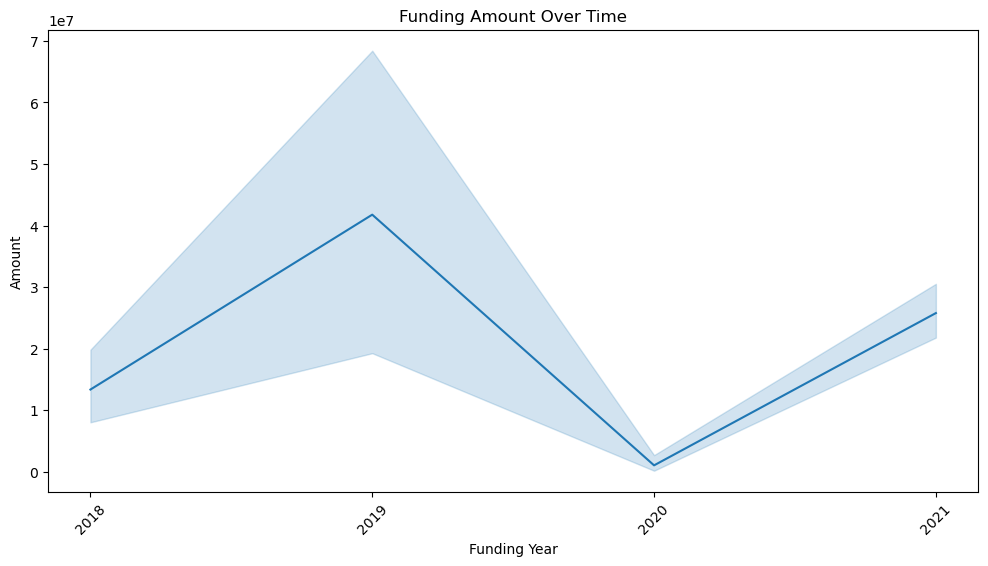

In [ ]:
# Temporal patterns of funding

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Funding Year', y='Amount')
plt.title('Funding Amount Over Time')
plt.xlabel('Funding Year')
plt.ylabel('Amount')

# Customize x-axis ticks
plt.xticks(df['Funding Year'].unique(), rotation=45)

plt.show()

MULTIVARIATE ANALYSIS

<Axes: >

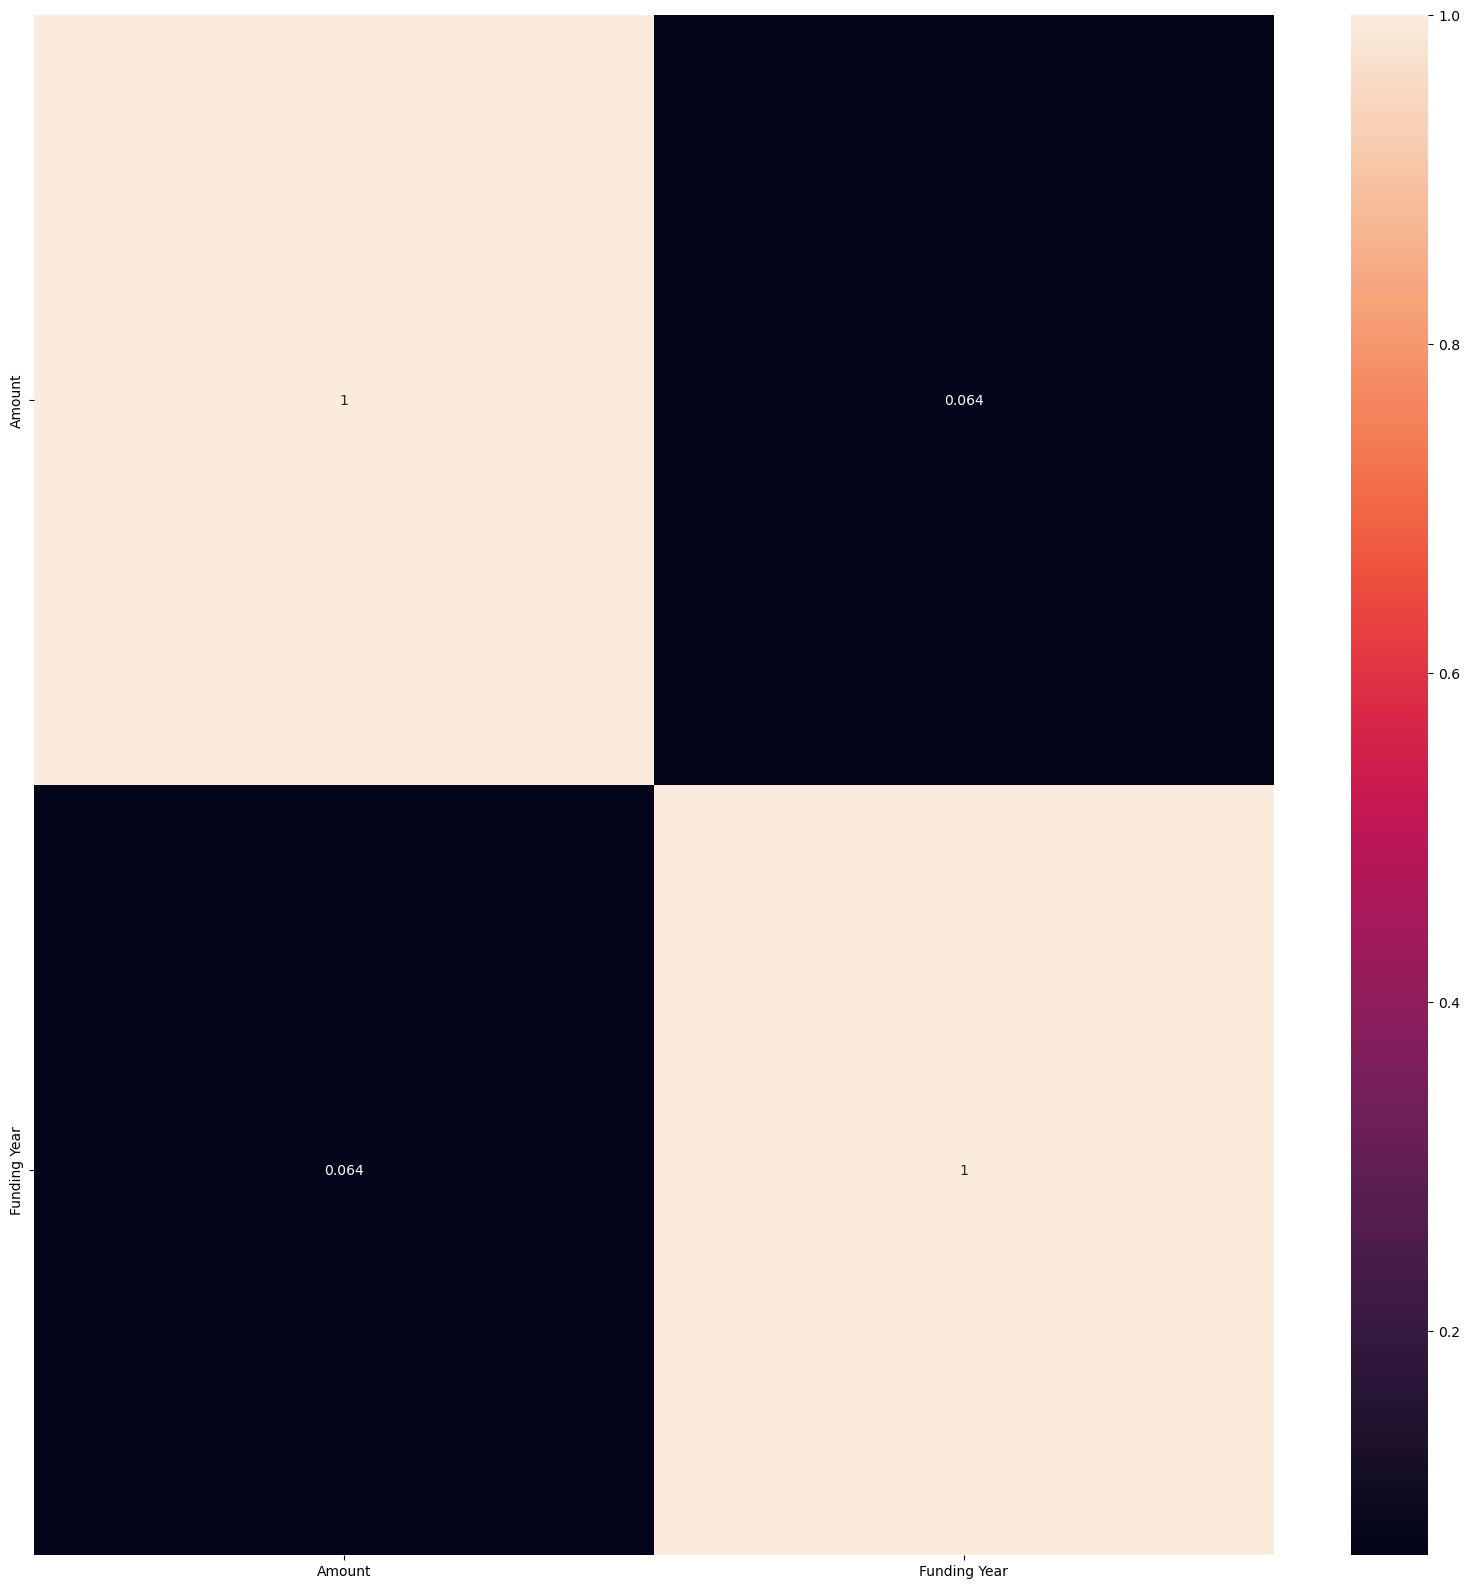

In [ ]:
#Check correlation between various attributes in the datatset
correlation = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot = True)

How did the COVID-19 pandemic in 2020 impact funding for startups compared to previous years? 

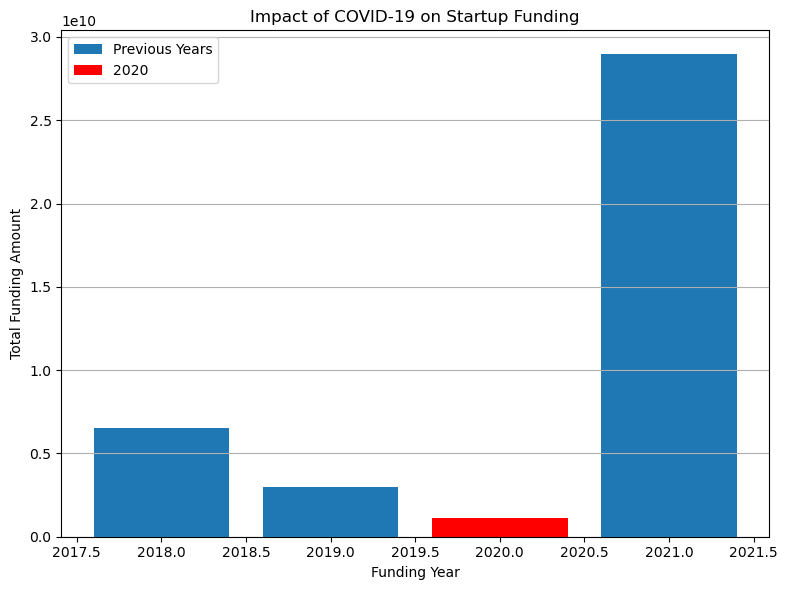

In [ ]:
# Calculate total funding amount for each year
funding_by_year = df.groupby("Funding Year")["Amount"].sum()

# Separate data for 2020 and previous years
funding_2020 = funding_by_year.loc[2020]
funding_previous_years = funding_by_year.loc[funding_by_year.index != 2020]

# Visualization - Bar plot to compare funding in 2020 and previous years
plt.figure(figsize=(8, 6))
plt.bar(funding_previous_years.index, funding_previous_years, label="Previous Years")
plt.bar(2020, funding_2020, color="red", label="2020")
plt.xlabel("Funding Year")
plt.ylabel("Total Funding Amount")
plt.title("Impact of COVID-19 on Startup Funding")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()

# Save the plot to a file
plt.savefig("startup_funding_impact.png")

# Show the plot
plt.show()

There was a significant decline in startup funding in 2020. The total funding amount for 2020 was about half of the total funding amount for 2019.

This decline in funding is likely due to the COVID-19 pandemic. The pandemic caused a recession, which led to a decrease in demand for goods and services. This, in turn, led to a decrease in investment in startups.

However, it's important to note that the decline in startup funding was not uniform across all industries. Some industries, such as healthcare and technology, actually saw an increase in funding during the pandemic. This is because these industries were seen as essential and were able to continue to grow even during the economic downturn.

Overall, the impact of COVID-19 on startup funding was significant. However, the decline in funding was not uniform across all industries. Some industries were able to weather the storm and even grow during the pandemic.

Which cities have the highest number of startups and the highest amount of funding received?

In [ ]:

# Group the data by Location and aggregate by count and sum
df_city = df.groupby("Location").agg({"Company": "count", "Amount": "sum"})

# Sort the data by count and sum in descending order
df_city = df_city.sort_values(by=["Company", "Amount"], ascending=False)

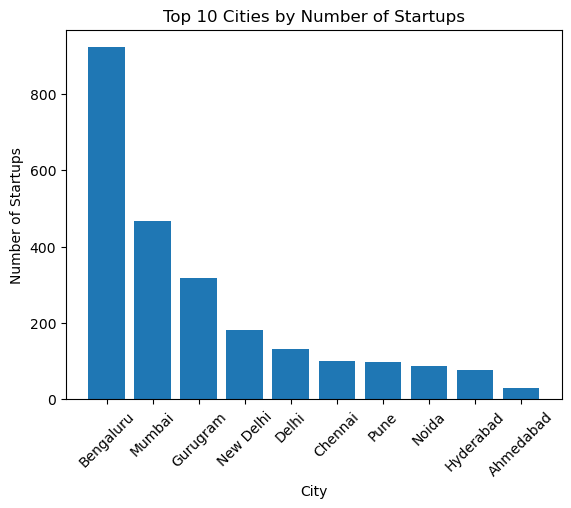

In [ ]:
# Plot a bar chart to show the top 10 cities by number of startups
plt.bar(df_city.index[:10], df_city["Company"][:10])
plt.title("Top 10 Cities by Number of Startups")
plt.xlabel("City")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.show()

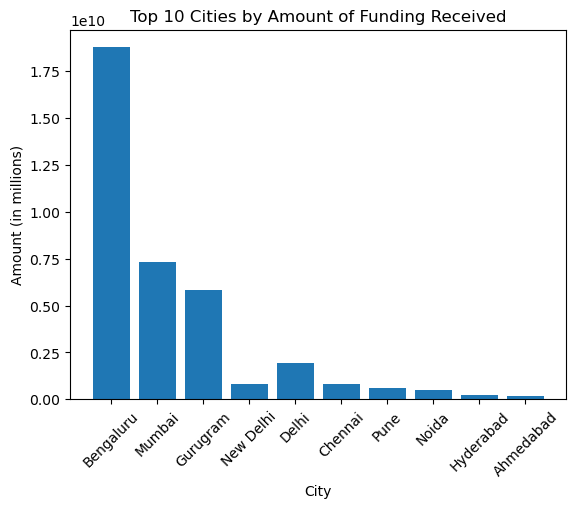

In [ ]:
# Plot a bar chart to show the top 10 cities by amount of funding received
plt.bar(df_city.index[:10], df_city["Amount"][:10])
plt.title("Top 10 Cities by Amount of Funding Received")
plt.xlabel("City")
plt.ylabel("Amount (in millions)")
plt.xticks(rotation=45)
plt.show()

Which sectors have the highest number of startups and the highest amount of funding received?

In [ ]:
 
# Group the data by Sector and aggregate by count and sum
df_sector = df.groupby("Sector").agg({"Company": "count", "Amount": "sum"})

# Sort the data by count and sum in descending order
df_sector = df_sector.sort_values(by=["Company", "Amount"], ascending=False)

# Select only the top 5 sectors
df_sector = df_sector[:5]

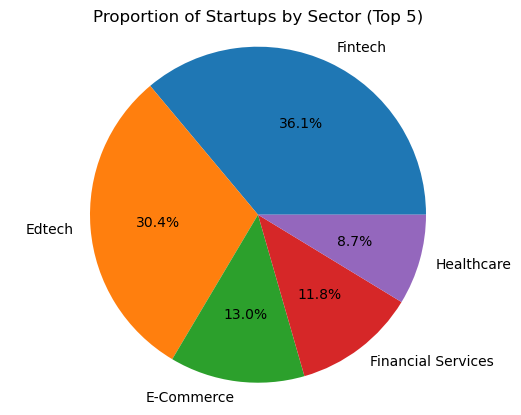

In [ ]:
# Plot a pie chart to show the proportion of startups by sector
plt.pie(df_sector["Company"], labels=df_sector.index, autopct="%1.1f%%")
plt.title("Proportion of Startups by Sector (Top 5)")
plt.axis("equal")
plt.show()

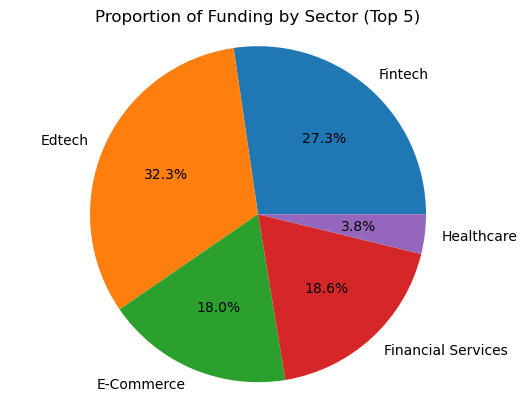

In [ ]:
# Plot a pie chart to show the proportion of funding by sector
plt.pie(df_sector["Amount"], labels=df_sector.index, autopct="%1.1f%%")
plt.title("Proportion of Funding by Sector (Top 5)")
plt.axis("equal")
plt.show()

Are there any correlations between the funding amount and the company's sector or location?

In [ ]:
# Convert categorical variables into numerical representations using label encoding.
le = LabelEncoder()
df['SectorEncoded'] = le.fit_transform(df['Sector'])
df['LocationEncoded'] = le.fit_transform(df['Location'])

In [ ]:
#Calculate the Pearson correlation coefficient between the funding amount and the numerical representation of the sector.
correlation_sector = df['Amount'].corr(df['SectorEncoded'], method='pearson')
print("Correlation between funding amount and sector:", correlation_sector)


Correlation between funding amount and sector: 0.016454838539416934


In [ ]:
#Calculate the Pearson correlation coefficient between the funding amount and the numerical representation of the location
correlation_location = df['Amount'].corr(df['LocationEncoded'], method='pearson')
print("Correlation between funding amount and location:", correlation_location)


Correlation between funding amount and location: -0.06070646474590689


Pearson Correlation between funding amount and sector: 0.016454838539416934
This value is close to 0, which suggests that there is little to no linear relationship between the funding amount and the sector.

Pearson Correlation between funding amount and location: -0.06070646474590689
This value is also close to 0, but slightly negative. It indicates that there is a weak, negative linear relationship between the funding amount and the location.

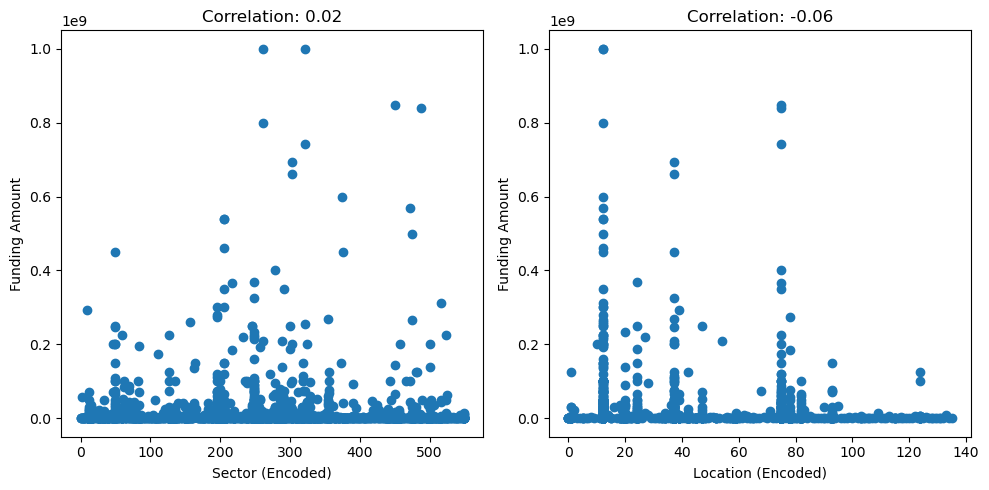

In [ ]:
# Create scatter plots to visualize the correlation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['SectorEncoded'], df['Amount'])
plt.xlabel('Sector (Encoded)')
plt.ylabel('Funding Amount')
plt.title(f'Correlation: {correlation_sector:.2f}')

plt.subplot(1, 2, 2)
plt.scatter(df['LocationEncoded'], df['Amount'])
plt.xlabel('Location (Encoded)')
plt.ylabel('Funding Amount')
plt.title(f'Correlation: {correlation_location:.2f}')

plt.tight_layout()
plt.show()

What are top 10 industries with the highest average funding?



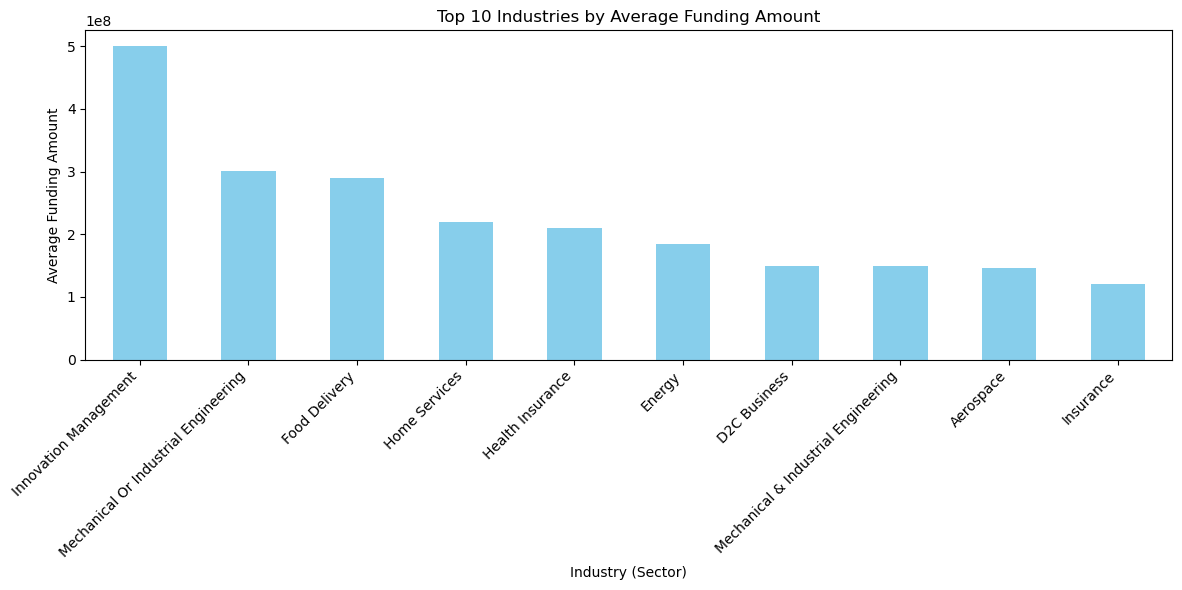

In [ ]:
# Calculate the average funding amount for startups in each industry (Sector)
average_funding_by_sector = df.groupby("Sector")["Amount"].mean()

# Sort the industries by average funding amount in descending order
top_10_industries = average_funding_by_sector.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 industries
plt.figure(figsize=(12, 6))
top_10_industries.plot(kind='bar', color='skyblue')
plt.xlabel("Industry (Sector)")
plt.ylabel("Average Funding Amount")
plt.title("Top 10 Industries by Average Funding Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

WHat are the top 5 cities with the highest average funding amount?



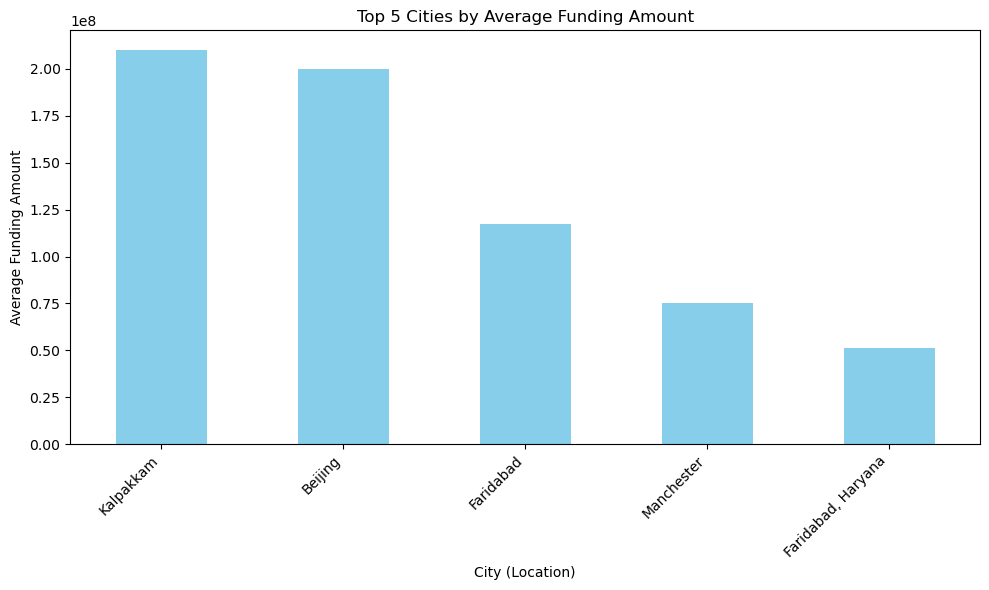

In [ ]:
# Calculate the average funding amount for startups in each city (Location)
average_funding_by_city = df.groupby("Location")["Amount"].mean()

# Sort the cities by average funding amount in descending order and select the top 5
top_5_cities = average_funding_by_city.sort_values(ascending=False).head(5)

# Create a bar plot for the top 5 cities
plt.figure(figsize=(10, 6))
top_5_cities.plot(kind='bar', color='skyblue')
plt.xlabel("City (Location)")
plt.ylabel("Average Funding Amount")
plt.title("Top 5 Cities by Average Funding Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

What is the correlation between the company's stage of development and the amount of funding it receives?


In [2]:
# Map stage of development to numeric values for correlation calculation
stage_mapping = {
    "Early Stage": 1,
    "Mid Stage": 2,
    "Late Stage": 3,
    "Other Stages": 4
}
df["Stage_numeric"] = df["Stage"].map(stage_mapping)

# Calculate the correlation between stage of development and funding amount
correlation = df["Stage_numeric"].corr(df["Amount"])

print("Correlation between Stage of Development and Funding Amount:", correlation)

NameError: name 'df' is not defined

The correlation coefficient of 0.118 indicates a weak positive correlation between the company's stage of development and the amount of funding it receives.


### Hypothesis:

#### NULL Hypothesis (HO) :

#### **The sector of a company does not have an impact on the amount of funding it receives.**


#### ALTERNATE Hypothesis (HA):

#### **The sector of a company does have an impact on the amount of funding it receives.**





In [ ]:


# Filter out sectors with less than two data points
sectors = df['Sector'].unique()
valid_sectors = [sector for sector in sectors if pd.notna(sector) and df['Sector'].value_counts().get(sector, 0) >= 2]

# Create lists of 'Amount' for each valid sector
amounts_by_sector = [df[df['Sector'] == sector]['Amount'] for sector in valid_sectors]

# Check if there are at least two valid sectors with sufficient data
if len(amounts_by_sector) < 2:
    print("Error: Insufficient data with more than one variability to perform the Kruskal-Wallis test.")
else:
    # Kruskal-Wallis Test
    result_kruskal = kruskal(*amounts_by_sector)

    # Set the significance level (alpha)
    alpha = 0.05

    print("Kruskal-Wallis Test:")
    print("H-statistic:", result_kruskal.statistic)
    print("P-value:", result_kruskal.pvalue)

    # Compare the p-value with the significance level to make a decision
    if result_kruskal.pvalue < alpha:
        print("Reject the null hypothesis: The sector of a company does have an impact on the amount of funding it receives.")
    else:
        print("Fail to reject the null hypothesis: The sector of a company does not have an impact on the amount of funding it receives.")


Kruskal-Wallis Test:
H-statistic: 716.4717765754599
P-value: 1.8675988298297976e-48
Reject the null hypothesis: The sector of a company does have an impact on the amount of funding it receives.
